# Installations

In [ ]:
#!pip install --upgrade tensorflow

In [ ]:
pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=a140bff42a7cc7f5133880c2e7453b28be0c60527d6efff41d67d61d1f381fc2
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [ ]:
pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.3 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 11.6 MB/s eta 0:00:00


In [ ]:
!pip install sklearn-crfsuite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 14.0 MB/s eta 0:00:00


In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git
from keras_contrib.layers import CRF

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-gf6iopgn
  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-gf6iopgn
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101055 sha256=b6cb40641ebab112f70d5c1fcafb7cb48516ee37931b26d28dc210e79928a310
  Stored in directory: /tmp/pip-ephem-wheel-cache-bi06ivjz/wheels/74/d5/f7/0245af7ac33d5b0c2e095688649916e4bf9a8d6b3362a849f5
Successfully built keras-contrib


In [ ]:
#!pip install git+https://github.com/MeMartijn/updated-sklearn-crfsuite.git #egg=sklearn_crfsuite

In [ ]:
pip install livelossplot

In [ ]:
!pip install sklearn-crfsuite

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Votre code ici


In [ ]:
from tensorflow import keras
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from math import nan
from keras.optimizers import Optimizer

from tensorflow.keras.utils import to_categorical
# **Second**rflow_addons.layers import CRF


from subprocess import check_output

# Importing cleaned data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/df_cleaned.csv')

In [ ]:
df[df['label'] == "FIRST_PRICE"]

sentences    words    tag        label  sentence_id
1357   instead of $141.08  instead  B-FPR  FIRST_PRICE          482
1358   instead of $141.08       of  I-FPR  FIRST_PRICE          482
1359   instead of $141.08  $141.08  I-FPR  FIRST_PRICE          482
1637   instead of $141.08  instead  B-FPR  FIRST_PRICE          535
1638   instead of $141.08       of  I-FPR  FIRST_PRICE          535
...                   ...      ...    ...          ...          ...
32689               $ 127      127  I-FPR  FIRST_PRICE         7664
32773               $ 127        $  B-FPR  FIRST_PRICE         7691
32774               $ 127      127  I-FPR  FIRST_PRICE         7691
32813               $ 127        $  B-FPR  FIRST_PRICE         7704
32814               $ 127      127  I-FPR  FIRST_PRICE         7704

[134 rows x 5 columns]

# **BiLSTM before Undersampling**

In [ ]:
df.label.value_counts()

other            39831
OCCUPANCY         5815
HOTEL_NAME        4580
ROOM_NAME         4441
PAYEMENT_TYPE     4400
RATE_NAME         4270
CATERING_TYPE     3746
RATE_CATEGORY     2933
NIGHTS            2473
PRICE             1949
CURRENCY          1498
NB_STARS          1203
FIRST_PRICE        134
TAX_INCLUDED        70
SOLDE               65
TAXCATEGORY         22
TAXVALUE             7
Name: label, dtype: int64

In [ ]:
words = list(set(df["words"].values))
words.append("ENDPAD")
n_words = len(words)

In [ ]:
n_words

4470

In [ ]:
tags = list(set(df["tag"].values))
tags.append("ENDPAD")
n_tags = len(tags)

In [ ]:
n_tags

32

In [ ]:
class SentenceGetter(object):

    def __init__(self, dataset):
        self.n_sent = 1
        self.dataset = dataset
        self.empty = False
        agg_func = lambda s: [(w, t) for w,t in zip(s["words"].values.tolist(),
                                                        s["tag"].values.tolist())]
        self.grouped = self.dataset.groupby("sentence_id").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [ ]:
getter = SentenceGetter(df)
sentences = getter.sentences

In [ ]:
sentences

[[('menu', 'O'), ('opener', 'O')],
 [('our', 'O'), ('hotel', 'O')],
 [('back', 'O')],
 [('france', 'O')],
 [('back', 'O')],
 [('our', 'O'), ('best', 'O'), ('destination', 'O')],
 [('paris', 'O')],
 [('marseille', 'O')],
 [('lyon', 'O')],
 [('toulouse', 'O')],
 [('nice', 'O')],
 [('nantes', 'O')],
 [('montpellier', 'O')],
 [('strasbourg', 'O')],
 [('bordeaux', 'O')],
 [('lille', 'O')],
 [('rennes', 'O')],
 [('reims', 'O')],
 [('toulon', 'O')],
 [('le', 'O'), ('havre', 'O')],
 [('grenoble', 'O')],
 [('anger', 'O')],
 [('clermontferrand', 'O')],
 [('aixenprovence', 'O')],
 [('brest', 'O')],
 [('amiens', 'O')],
 [('bayonne', 'O')],
 [('all', 'O'), ('our', 'O'), ('hotel', 'O'), ('in', 'O'), ('france', 'O')],
 [('germany', 'O')],
 [('back', 'O')],
 [('our', 'O'), ('best', 'O'), ('destination', 'O')],
 [('berlin', 'O')],
 [('mnchen', 'O')],
 [('frankfurt', 'O'), ('am', 'O'), ('main', 'O')],
 [('hamburg', 'O')],
 [('kln', 'O')],
 [('dsseldorf', 'O')],
 [('stuttgart', 'O')],
 [('hannover', 'O')

In [ ]:
sentences[3]

[('france', 'O')]

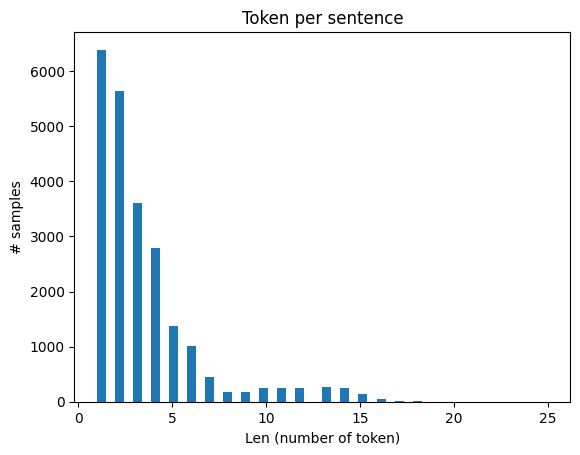

In [ ]:
# Plot sentence by lenght
plt.hist([len(s) for s in sentences], bins=50)
plt.title('Token per sentence')
plt.xlabel('Len (number of token)')
plt.ylabel('# samples')
plt.show()

In [ ]:
from numpy import max
maxl = max([len(s) for s in sentences])
print ('Maximum sequence length in the list of sentences:', maxl)

Maximum sequence length in the list of sentences: 25


In [ ]:
for s in sentences:
  if len(s) == maxl:
    print(s)

[('airport', 'O'), ('transfer', 'O'), ('is', 'O'), ('available', 'O'), ('at', 'O'), ('no', 'O'), ('additional', 'O'), ('charge', 'O'), ('in', 'O'), ('order', 'O'), ('to', 'O'), ('reserve', 'O'), ('the', 'O'), ('transfer', 'O'), ('please', 'O'), ('inform', 'O'), ('the', 'O'), ('property', 'O'), ('of', 'O'), ('your', 'O'), ('arrival', 'O'), ('detail', 'O'), ('prior', 'O'), ('to', 'O'), ('arrival', 'O')]


In [ ]:
from future.utils import iteritems

word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

idx2tag = {v: k for k, v in iteritems(tag2idx)}

In [ ]:
idx2tag

{0: 'B-TAXCAT',
 1: 'B-FPR',
 2: 'I-FPR',
 3: 'I-PR',
 4: 'I-RNAME',
 5: 'B-OCC',
 6: 'I-OCC',
 7: 'I-PTYPE',
 8: 'O',
 9: 'B-CURR',
 10: 'B-INCL',
 11: 'B-RONAME',
 12: 'I-NIGHTS',
 13: 'B-PTYPE',
 14: 'I-CATTYPE',
 15: 'B-TAXVAL',
 16: 'I-HOTNAME',
 17: 'B-HOTNAME',
 18: 'I-CURR',
 19: 'B-SLD',
 20: 'B-RACAT',
 21: 'B-RNAME',
 22: 'I-STAR',
 23: 'B-PR',
 24: 'I-RONAME',
 25: 'B-CATTYPE',
 26: 'I-RACAT',
 27: 'I-TAXCAT',
 28: 'I-INCL',
 29: 'B-NIGHTS',
 30: 'B-STAR',
 31: 'ENDPAD'}

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = [[word2idx[w[0]] for w in s] for s in sentences]
X

[[3749, 117],
 [3231, 3849],
 [768],
 [3031],
 [768],
 [3231, 304, 2849],
 [619],
 [855],
 [2048],
 [3384],
 [2916],
 [4321],
 [2107],
 [2504],
 [908],
 [2893],
 [2159],
 [275],
 [2176],
 [2608, 1188],
 [4136],
 [1245],
 [3383],
 [4288],
 [3719],
 [2620],
 [1403],
 [4141, 3231, 3849, 437, 3031],
 [3467],
 [768],
 [3231, 304, 2849],
 [3212],
 [1811],
 [2621, 4117, 2547],
 [2258],
 [1099],
 [3562],
 [2467],
 [1189],
 [43],
 [909],
 [1273],
 [2034],
 [2084],
 [4028],
 [2011],
 [694],
 [4168],
 [2095],
 [282],
 [705],
 [4299],
 [2239],
 [4141, 3231, 3849, 437, 3467],
 [3656],
 [768],
 [3231, 304, 2849],
 [3766],
 [2162],
 [3875],
 [3491],
 [463],
 [2378],
 [2759, 3014],
 [2381],
 [2350],
 [4331],
 [1647],
 [1771],
 [3048],
 [3546],
 [3321],
 [650],
 [2173],
 [4290],
 [81],
 [4197],
 [3951],
 [1180],
 [1986],
 [464],
 [3676],
 [3391],
 [1465],
 [3809],
 [3326],
 [4454],
 [3261],
 [3745],
 [1502],
 [4141, 3231, 3849, 437, 3656],
 [611],
 [768],
 [3231, 304, 2849],
 [3826],
 [4222],
 [771, 36

In [ ]:
X = pad_sequences(maxlen=maxl, sequences=X, padding="post",value=n_words - 1)
X

array([[3749,  117, 4469, ..., 4469, 4469, 4469],
       [3231, 3849, 4469, ..., 4469, 4469, 4469],
       [ 768, 4469, 4469, ..., 4469, 4469, 4469],
       ...,
       [4179, 4469, 4469, ..., 4469, 4469, 4469],
       [4179, 4469, 4469, ..., 4469, 4469, 4469],
       [4179, 4469, 4469, ..., 4469, 4469, 4469]], dtype=int32)

In [ ]:
 y = [[tag2idx[w[1]] for w in s] for s in sentences]
 y

[[8, 8],
 [8, 8],
 [8],
 [8],
 [8],
 [8, 8, 8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8, 8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8, 8, 8, 8, 8],
 [8],
 [8],
 [8, 8, 8],
 [8],
 [8],
 [8, 8, 8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8, 8, 8, 8, 8],
 [8],
 [8],
 [8, 8, 8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8, 8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8, 8, 8, 8, 8],
 [8],
 [8],
 [8, 8, 8],
 [8],
 [8],
 [8, 8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8, 8, 8, 8, 8],
 [8],
 [8],
 [8, 8, 8],
 [8, 8, 8],
 [8, 8, 8, 8],
 [8, 8, 8],
 [8, 8, 8, 8],
 [8, 8, 8, 8],
 [8, 8, 8, 8],
 [8, 8, 8, 8, 8],
 [8, 8, 8, 8],
 [8, 8, 8, 8],
 [8, 8, 8, 8, 8],
 [8],
 [8],
 [8, 8, 8],
 [8, 8, 8],
 [8],
 

In [ ]:
y = pad_sequences(maxlen=maxl, sequences=y, padding="post", value=tag2idx["ENDPAD"])
y

array([[ 8,  8, 31, ..., 31, 31, 31],
       [ 8,  8, 31, ..., 31, 31, 31],
       [ 8, 31, 31, ..., 31, 31, 31],
       ...,
       [30, 31, 31, ..., 31, 31, 31],
       [30, 31, 31, ..., 31, 31, 31],
       [30, 31, 31, ..., 31, 31, 31]], dtype=int32)

In [ ]:
#This is the length of longest sequence in the list os sentences. So this should be our size of max_padding
maxl

25

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
y_test

array([[ 8,  8,  8, ..., 31, 31, 31],
       [29, 12, 31, ..., 31, 31, 31],
       [ 9, 31, 31, ..., 31, 31, 31],
       ...,
       [30, 31, 31, ..., 31, 31, 31],
       [ 8,  8, 31, ..., 31, 31, 31],
       [25, 14, 14, ..., 31, 31, 31]], dtype=int32)

In [ ]:
x_train.shape

(18493, 25)

In [ ]:
y_train.shape

(18493, 25)

In [ ]:
import keras.utils
from tensorflow.keras.utils import to_categorical

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [ ]:
y_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
print(x_train.shape, y_train.shape)

(18493, 25) (18493, 25, 32)


In [ ]:
print(x_test.shape, y_test.shape)

(4624, 25) (4624, 25)


In [ ]:
y_test = to_categorical(y_test)

In [ ]:
print(x_test.shape, y_test.shape)

(4624, 25) (4624, 25, 32)


In [ ]:
print(keras.__version__)

2.13.1


## **Training**

In [ ]:
from tensorflow.keras import Model, Input,Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional
from keras.layers import TimeDistributed, Dropout, Bidirectional
from numpy import shape
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback
from keras_contrib.layers import CRF
import keras as k

In [ ]:
pip install tf2crf

In [ ]:
#from tf2crf import CRF
#from tf2crf import CRF, ModelWithCRFLoss

'''input = Input(shape=(maxl,))
#word_embedding_size = 300
model = Embedding(input_dim=n_words, output_dim=maxl, input_length=maxl)(input)
model = Bidirectional(LSTM(units=n_words,
                           return_sequences=True,
                           dropout=0.5,
                           recurrent_dropout=0.5,
                           kernel_initializer=k.initializers.he_normal()))(model)
model = LSTM(units=n_words* 2,
             return_sequences=True,
             dropout=0.5,
             recurrent_dropout=0.5,
             kernel_initializer=k.initializers.he_normal())(model)
model = TimeDistributed(Dense(n_tags, activation="relu"))(model)

crf = CRF(n_tags)  # CRF layer
out = crf(model)

#base_model = Model(input, out)
#model = ModelWithCRFLoss(base_model, sparse_target=True)'''

'input = Input(shape=(maxl,))\n#word_embedding_size = 300\nmodel = Embedding(input_dim=n_words, output_dim=maxl, input_length=maxl)(input)\nmodel = Bidirectional(LSTM(units=n_words,\n                           return_sequences=True,\n                           dropout=0.5,\n                           recurrent_dropout=0.5,\n                           kernel_initializer=k.initializers.he_normal()))(model)\nmodel = LSTM(units=n_words* 2,\n             return_sequences=True,\n             dropout=0.5,\n             recurrent_dropout=0.5,\n             kernel_initializer=k.initializers.he_normal())(model)\nmodel = TimeDistributed(Dense(n_tags, activation="relu"))(model)\n\ncrf = CRF(n_tags)  # CRF layer\nout = crf(model)\n\n#base_model = Model(input, out)\n#model = ModelWithCRFLoss(base_model, sparse_target=True)'

In [ ]:
#model = Model(input, out)

In [ ]:
'''from tf2crf import CRF
from tf2crf import CRF, ModelWithCRFLoss'''

from keras_contrib.layers import CRF

input=Input(shape=(maxl,))

model=Embedding(input_dim=n_words,output_dim=300,input_length=maxl)(input)
model=SpatialDropout1D(0.1)(model)
model=Bidirectional(LSTM(units=300,return_sequences=True, recurrent_dropout=0.1))(model)
output =TimeDistributed(Dense(n_tags, activation="softmax"))(model)

# Ajouter la couche CRF
'''crf = CRF(n_tags)
out = crf(model)

model = Model(input, out)

base_model = Model(input, out)
model = ModelWithCRFLoss(base_model, sparse_target=True)'''

'crf = CRF(n_tags)\nout = crf(model)\n\nmodel = Model(input, out)\n\nbase_model = Model(input, out)\nmodel = ModelWithCRFLoss(base_model, sparse_target=True)'

In [ ]:
model = Model(input, output)

In [ ]:
#adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)
#model.compile(optimizer="adam", loss=crf.loss_function, metrics=[crf.accuracy, 'accuracy'])
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25)]              0         
                                                                 
 embedding (Embedding)       (None, 25, 300)           1341000   
                                                                 
 spatial_dropout1d (Spatial  (None, 25, 300)           0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 25, 600)           1442400   
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 25, 32)            19232     
 ributed)                                                        
                                                             

In [ ]:
#early_stop= EarlyStopping(monitor='val_accuracy',patience=1,verbose=1,mode='max',restore_best_weights=False)
#callbacks=[PlotLossesCallback(),early_stop]

history = model.fit(x_train,np.array(y_train),validation_split=0.2,batch_size=64,epochs=10,verbose=1)

Epoch 1/10
232/232 [==============================] - 103s 400ms/step - loss: 0.2974 - accuracy: 0.9380 - val_loss: 0.0744 - val_accuracy: 0.9825
Epoch 2/10
232/232 [==============================] - 57s 245ms/step - loss: 0.0357 - accuracy: 0.9918 - val_loss: 0.0214 - val_accuracy: 0.9953
Epoch 3/10
232/232 [==============================] - 53s 230ms/step - loss: 0.0151 - accuracy: 0.9963 - val_loss: 0.0142 - val_accuracy: 0.9964
Epoch 4/10
232/232 [==============================] - 51s 221ms/step - loss: 0.0104 - accuracy: 0.9973 - val_loss: 0.0110 - val_accuracy: 0.9972
Epoch 5/10
232/232 [==============================] - 52s 226ms/step - loss: 0.0085 - accuracy: 0.9975 - val_loss: 0.0107 - val_accuracy: 0.9972
Epoch 6/10
232/232 [==============================] - 50s 218ms/step - loss: 0.0070 - accuracy: 0.9981 - val_loss: 0.0103 - val_accuracy: 0.9973
Epoch 7/10
232/232 [==============================] - 52s 222ms/step - loss: 0.0061 - accuracy: 0.9982 - val_loss: 0.0091 - val_a

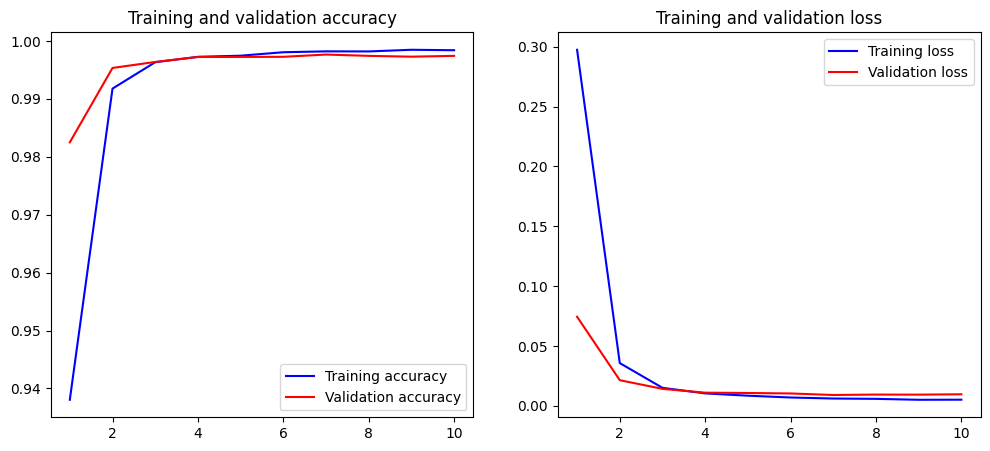

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

In [ ]:
model.evaluate(x_test,np.array(y_test))

145/145 [==============================] - 4s 25ms/step - loss: 0.0099 - accuracy: 0.9976


[0.009924083016812801, 0.9975864887237549]

## **Evaluation**

### **F1 Score**

In [ ]:
test_pred = model.predict(x_test, verbose=1)
idx2tag = {i: w for w, i in tag2idx.items()}

def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PAD", "O"))
        out.append(out_i)
    return out

pred_labels = pred2label(test_pred)
test_labels = pred2label(y_test)

145/145 [==============================] - 3s 18ms/step


In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
print("F1-score: ", f1_score(test_labels, pred_labels))

/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: ENDO seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


F1-score:  0.9987937391169004


In [ ]:
from sklearn_crfsuite.metrics import flat_f1_score

f1_score = flat_f1_score(test_labels, pred_labels, average='macro')
# Afficher le F1-score
f1_score

0.923988992650955

In [ ]:
pip install scikit-learn

### **Classification Report**

In [ ]:
# Eval
pred_cat = model.predict(x_test)
pred = np.argmax(pred_cat, axis=-1)
y_test_true = np.argmax(y_test, -1)

145/145 [==============================] - 3s 22ms/step


In [ ]:
!pip install sklearn_crfsuite

In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

In [ ]:
#!pip install  "scikit-learn==0.24.2"

In [ ]:
'''from  sklearn_crfsuite.metrics import flat_classification_report
from sklearn.metrics import classification_report

report = classification_report(pred_labels,test_labels)
print(report)'''

'from  sklearn_crfsuite.metrics import flat_classification_report\nfrom sklearn.metrics import classification_report\n\nreport = classification_report(pred_labels,test_labels)\nprint(report)'

In [ ]:
from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.metrics import classification_report

# Flatten the y_test_true and pred to convert them into 1D arrays
y_test_true_flat = [item for sublist in y_test_true for item in sublist]
pred_flat = [item for sublist in pred for item in sublist]

# Convert the indices to tag labels for y_test_true_flat and pred_flat
y_test_true_tag = [idx2tag[i] for i in y_test_true_flat]
pred_tag = [idx2tag[i] for i in pred_flat]

# Generate the classification report
report = classification_report(y_test_true_tag, pred_tag)
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

   B-CATTYPE       0.95      0.90      0.93       262
      B-CURR       0.95      1.00      0.97       248
       B-FPR       0.60      1.00      0.75         9
   B-HOTNAME       1.00      0.98      0.99       247
      B-INCL       1.00      0.86      0.92         7
    B-NIGHTS       0.99      1.00      1.00       228
       B-OCC       1.00      0.99      0.99       242
        B-PR       0.98      0.90      0.94       292
     B-PTYPE       0.99      1.00      0.99       250
     B-RACAT       0.98      0.99      0.99       227
     B-RNAME       0.91      0.95      0.93       244
    B-RONAME       0.97      0.92      0.95       252
       B-SLD       1.00      0.64      0.78        14
      B-STAR       1.00      1.00      1.00       232
    B-TAXCAT       1.00      1.00      1.00         2
    B-TAXVAL       1.00      1.00      1.00         1
      ENDPAD       1.00      1.00      1.00    100027
   I-CATTYPE       0.97    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_train = model.predict(x_train)

y_pred2_train = np.argmax(y_pred_train, axis=2)

y_train2 = np.argmax(y_train, axis=2)


578/578 [==============================] - 12s 21ms/step


In [ ]:
y_train2

array([[21,  4, 31, ..., 31, 31, 31],
       [ 8,  8, 31, ..., 31, 31, 31],
       [ 8,  8,  8, ..., 31, 31, 31],
       ...,
       [ 8, 19,  8, ..., 31, 31, 31],
       [ 8,  8,  8, ..., 31, 31, 31],
       [23, 31, 31, ..., 31, 31, 31]])

### **Confusion Matrix**

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
def tag_conf_matrix(cm, tagid):

    tag_name = idx2tag[tagid]
    print("Tag name: {}".format(tag_name))
    print(cm[tagid])
    tn, fp, fn, tp = cm[tagid].ravel()
    tag_acc = (tp + tn) / (tn + fp + fn + tp)
    #print("Tag accuracy: {:.3f} \n".format(tag_acc))

matrix = multilabel_confusion_matrix(y_test_true.flatten(), pred.flatten())

for tag_id in range(len(idx2tag)):
    tag_conf_matrix(matrix, tag_id)

Tag name: B-TAXCAT
[[115598      0]
 [     0      2]]
Tag name: B-FPR
[[115585      6]
 [     0      9]]
Tag name: I-FPR
[[115584      6]
 [     0     10]]
Tag name: I-PR
[[115482      1]
 [    19     98]]
Tag name: I-RNAME
[[114994     57]
 [     5    544]]
Tag name: B-OCC
[[115357      1]
 [     2    240]]
Tag name: I-OCC
[[114661      0]
 [     2    937]]
Tag name: I-PTYPE
[[114931      8]
 [     0    661]]
Tag name: O
[[107371     95]
 [    77   8057]]
Tag name: B-CURR
[[115339     13]
 [     0    248]]
Tag name: B-INCL
[[115593      0]
 [     1      6]]
Tag name: B-RONAME
[[115342      6]
 [    20    232]]
Tag name: I-NIGHTS
[[115353      1]
 [     0    246]]
Tag name: B-PTYPE
[[115347      3]
 [     0    250]]
Tag name: I-CATTYPE
[[115090     16]
 [    32    462]]
Tag name: B-TAXVAL
[[115599      0]
 [     0      1]]
Tag name: I-HOTNAME
[[114919      0]
 [    14    667]]
Tag name: B-HOTNAME
[[115353      0]
 [     5    242]]
Tag name: I-CURR
[[115551      0]
 [     0     49]]
Tag

145/145 [==============================] - 3s 23ms/step


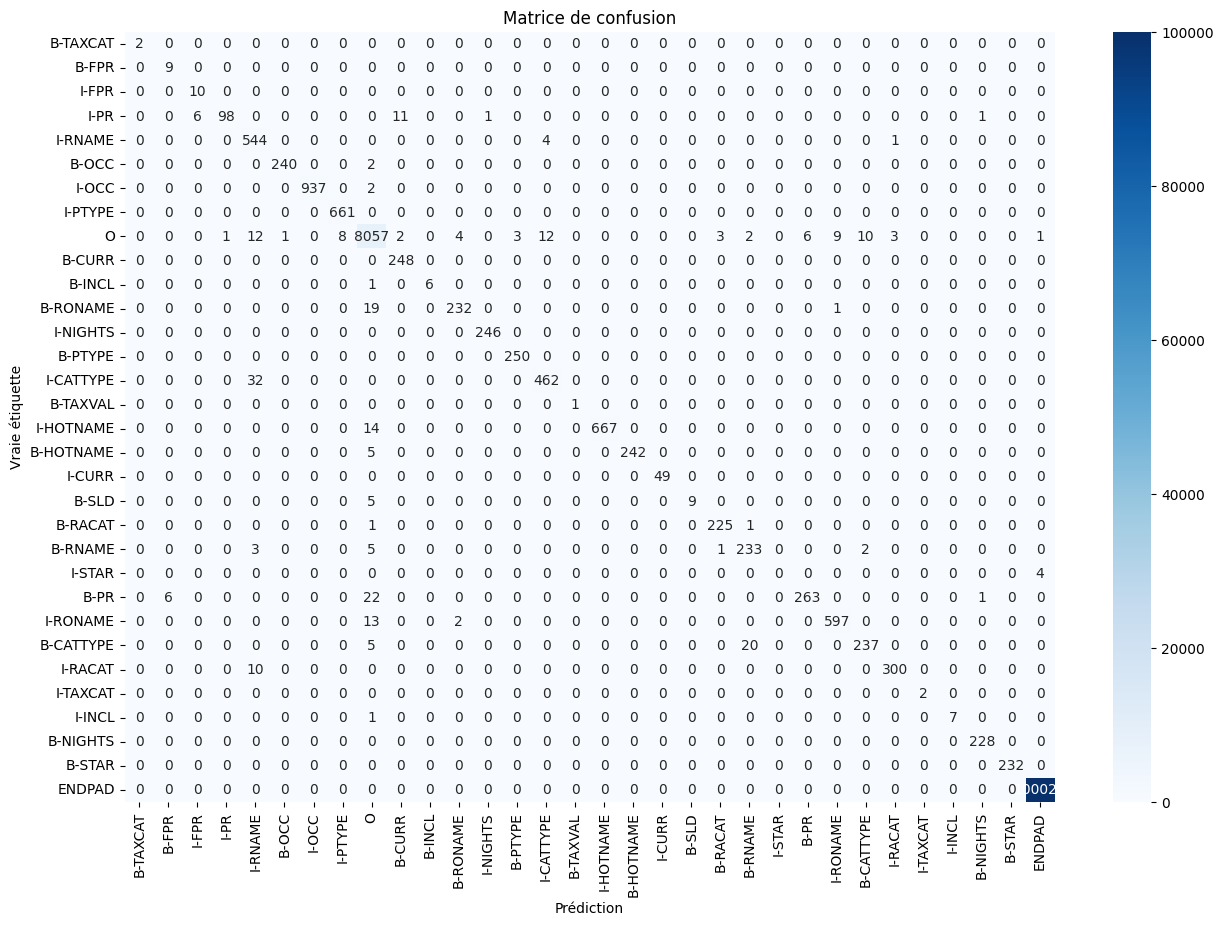

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Prédictions sur les données de test
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)  # Convertir les probabilités en indices de classe

# Convertir les étiquettes réelles en indices de classe
y_true = np.argmax(y_test, axis=-1)

# Calculer la matrice de confusion
confusion_mat = confusion_matrix(y_true.flatten(), y_pred.flatten())

# Étiquettes de classe
class_labels = list(tag2idx.keys())

# Tracer la matrice de confusion
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Prédiction")
plt.ylabel("Vraie étiquette")
plt.title("Matrice de confusion")
plt.show()

## **Predictions**

In [ ]:
# Exemple de nouvelles données sous forme de séquences de mots (liste de listes)
new_data = [
    ["central", "hotel", "fort-de-france"],
    ["9.4"],
    ["€92"],
    ["non-smoking","room"],
    ["chf 200.50"],
    ["breakfast"],
]

# Convertir les mots en indices à l'aide du dictionnaire word2idx
new_data_indices = [[word2idx.get(word, n_words - 1) for word in sentence] for sentence in new_data]

# Rembourrer les séquences de mots pour qu'elles aient la même longueur que les séquences d'entraînement
new_data_padded = pad_sequences(maxlen=maxl, sequences=new_data_indices, padding="post", value=n_words - 1)

# Faire les prédictions sur les nouvelles données
predictions = model.predict(new_data_padded)

# Convertir les probabilités en étiquettes prédites (indices de classe)
predicted_labels = np.argmax(predictions, axis=-1)

# Convertir les indices de classe en étiquettes textuelles à l'aide du dictionnaire idx2tag
predicted_tags = [[idx2tag[idx] for idx in sentence] for sentence in predicted_labels]

# Afficher les prédictions
for i, sentence in enumerate(new_data):
    print("Phrase:", " ".join(sentence))
    print("Prédiction:", " ".join(predicted_tags[i]))
    print()

# **Undersampling**

In [ ]:
df['tag'].value_counts()

other            39831
OCCUPANCY         5815
HOTEL_NAME        4580
ROOM_NAME         4441
PAYEMENT_TYPE     4400
RATE_NAME         4270
CATERING_TYPE     3746
RATE_CATEGORY     2933
NIGHTS            2473
PRICE             1949
CURRENCY          1498
NB_STARS          1203
FIRST_PRICE        134
TAX_INCLUDED        70
SOLDE               65
TAXCATEGORY         22
TAXVALUE             7
Name: label, dtype: int64

In [ ]:
import pandas as pd


# Compter le nombre d'échantillons dans la classe "other"
count_other = df[df['label'] == 'other'].shape[0]

# Déterminer le nombre d'échantillons à conserver
undersample_size = 6000

# Si le nombre d'échantillons "other" est supérieur à l'undersample_size, effectuez l'undersampling
if count_other > undersample_size:
    # Filtrer les échantillons de la classe "other" à conserver
    df_other = df[df['label'] == 'other'].sample(n=undersample_size, random_state=42)

    # Filtrer les échantillons des autres classes
    df_non_other = df[df['label'] != 'other']

    # Concaténer les DataFrames filtrés
    df_undersampled = pd.concat([df_other, df_non_other], ignore_index=True)
else:
    df_undersampled = df



In [ ]:
df_undersampled

sentences        words     tag  \
0      due to covid19 circumstances a dedicated hotli...         been       O   
1      from the amount to be paid for your new reserv...  reservation       O   
2      like 24hour room service room service and dail...      service       O   
3      72 the mercure can be a 4star but the shuttle ...          the       O   
4      this can vary from one hotel to another for re...        hotel       O   
...                                                  ...          ...     ...   
43601                                                7.6          7.6  B-STAR   
43602                                                7.6          7.6  B-STAR   
43603                                                7.6          7.6  B-STAR   
43604                                                7.6          7.6  B-STAR   
43605                                                7.6          7.6  B-STAR   

          label  sentence_id  
0         other         3037  
1         other          692  
2         other         5782  
3         other         3378  
4         other         1496  
...         ...          ...  
43601  NB_STARS        23112  
43602  NB_STARS        23113  
43603  NB_STARS        23114  
43604  NB_STARS        23115  
43605  NB_STARS        23116  

[43606 rows x 5 columns]

# **Trying Data Augmentation**

In [ ]:
pip install textaugment

In [ ]:
import nltk
#nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from textaugment import Wordnet

# Créer une instance de Wordnet pour les synonymes
wordnet_augmenter = Wordnet()

# Liste des classes minoritaires
minority_classes = ['FIRST_PRICE', 'TAX_INCLUDED', 'SOLDE', 'TAXCATEGORY', 'TAXVALUE']

# DataFrame pour stocker les exemples augmentés
augmented_data = pd.DataFrame(columns=['sentences', 'words', 'tag', 'label', 'sentence_id'])

# Parcourir les classes minoritaires
for minority_class in minority_classes:
    # Filtrer les exemples de la classe minoritaire
    minority_examples = df_undersampled[df_undersampled['label'] == minority_class]

    # Appliquer l'augmentation de données à chaque exemple
    for index, row in minority_examples.iterrows():
        sentence = row['sentences']
        augmented_sentence = wordnet_augmenter.augment(sentence)

        # Ajouter l'exemple augmenté au DataFrame
        augmented_data = augmented_data.append({'sentences': augmented_sentence,
                                                'words': row['words'],
                                                'tag': row['tag'],
                                                'label': row['label'],
                                                'sentence_id': row['sentence_id']},
                                                ignore_index=True)

# Ajouter les exemples augmentés au DataFrame d'origine
df_undersampled = pd.concat([df_undersampled, augmented_data])

# Maintenant, vous avez des exemples augmentés pour les classes minoritaires dans votre DataFrame


In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Liste des classes minoritaires
minority_classes = ['FIRST_PRICE', 'TAX_INCLUDED', 'SOLDE', 'TAXCATEGORY', 'TAXVALUE']

# Filtrer les exemples des classes minoritaires
minority_examples = df_undersampled[df_undersampled['label'].isin(minority_classes)]

# Séparer les caractéristiques et les étiquettes
X = minority_examples[['sentences', 'words', 'tag', 'sentence_id']]
y = minority_examples['label']

# Appliquer l'oversampling
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Créer un DataFrame avec les exemples resamplés
resampled_data = pd.DataFrame({'sentences': X_resampled['sentences'],
                               'words': X_resampled['words'],
                               'tag': X_resampled['tag'],
                               'label': y_resampled,
                               'sentence_id': X_resampled['sentence_id']})

# Combiner les exemples resamplés avec le DataFrame d'origine
df_undersampled = pd.concat([df_undersampled, resampled_data])


In [ ]:
augmented_data[augmented_data["label"] == "FIRST_PRICE"]

In [ ]:
resampled_data

In [ ]:
# Afficher les exemples augmentés
print("Exemples augmentés ajoutés :")
print(augmented_data)

# Afficher le nombre d'exemples ajoutés
num_augmented_examples = augmented_data.shape[0]
print(f"Nombre total d'exemples augmentés ajoutés : {num_augmented_examples}")


In [ ]:
pip install translate

In [ ]:
df_undersampled

In [ ]:
df_undersampled[df_undersampled["label"] == "FIRST_PRICE"]

sentences    words    tag        label sentence_id
6065  instead of $141.08  instead  B-FPR  FIRST_PRICE         482
6066  instead of $141.08       of  I-FPR  FIRST_PRICE         482
6067  instead of $141.08  $141.08  I-FPR  FIRST_PRICE         482
6080  instead of $141.08  instead  B-FPR  FIRST_PRICE         535
6081  instead of $141.08       of  I-FPR  FIRST_PRICE         535
...                  ...      ...    ...          ...         ...
129                $ 127      127  I-FPR  FIRST_PRICE        7664
130                $ 127        $  B-FPR  FIRST_PRICE        7691
131                $ 127      127  I-FPR  FIRST_PRICE        7691
132                $ 127        $  B-FPR  FIRST_PRICE        7704
133                $ 127      127  I-FPR  FIRST_PRICE        7704

[268 rows x 5 columns]

# **BiLSTM After Undersampling**

In [ ]:
df_undersampled.label.value_counts()

other            6000
OCCUPANCY        5815
HOTEL_NAME       4580
ROOM_NAME        4441
PAYEMENT_TYPE    4400
RATE_NAME        4270
CATERING_TYPE    3746
RATE_CATEGORY    2933
NIGHTS           2473
PRICE            1949
CURRENCY         1498
NB_STARS         1203
FIRST_PRICE       134
TAX_INCLUDED       70
SOLDE              65
TAXCATEGORY        22
TAXVALUE            7
Name: label, dtype: int64

In [ ]:
words = list(set(df_undersampled["words"].values))
words.append("ENDPAD")
n_words = len(words)

In [ ]:
n_words

2163

In [ ]:
tags = list(set(df_undersampled["tag"].values))
tags.append("ENDPAD")
n_tags = len(tags)

In [ ]:
n_tags

32

In [ ]:
class SentenceGetter(object):

    def __init__(self, dataset):
        self.n_sent = 1
        self.dataset = dataset
        self.empty = False
        agg_func = lambda s: [(w, t) for w,t in zip(s["words"].values.tolist(),
                                                        s["tag"].values.tolist())]
        self.grouped = self.dataset.groupby("sentence_id").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [ ]:
getter = SentenceGetter(df_undersampled)
sentences = getter.sentences

In [ ]:
sentences

[[('opener', 'O')],
 [('back', 'O')],
 [('toulouse', 'O')],
 [('le', 'O')],
 [('hotel', 'O')],
 [('best', 'O')],
 [('nrnberg', 'O')],
 [('braunschweig', 'O')],
 [('germany', 'O'), ('in', 'O')],
 [('destination', 'O')],
 [('dampezzo', 'O')],
 [('faenza', 'O')],
 [('padova', 'O')],
 [('pisa', 'O')],
 [('verona', 'O')],
 [('back', 'O')],
 [('castelln', 'O')],
 [('girona', 'O')],
 [('in', 'O')],
 [('bb', 'O')],
 [('rzeszw', 'O'), ('centrum', 'O')],
 [('all', 'O')],
 [('janeiro', 'O'), ('rio', 'O')],
 [('so', 'O')],
 [('brazil', 'O')],
 [('setbal', 'O')],
 [('in', 'O')],
 [('destination', 'O')],
 [('nyon', 'O')],
 [('oftringen', 'O')],
 [('switzerland', 'O'), ('in', 'O')],
 [('belgium', 'O')],
 [('back', 'O')],
 [('antwerp', 'O')],
 [('all', 'O'), ('belgium', 'O'), ('our', 'O')],
 [('czech', 'O'), ('republic', 'O')],
 [('slovenia', 'O')],
 [('best', 'O')],
 [('hotel', 'O'), ('amsterdamzaandam', 'O')],
 [('back', 'O')],
 [('best', 'O')],
 [('back', 'O')],
 [('loyalty', 'O')],
 [('and', 'O')]

In [ ]:
sentences[3]

[('le', 'O')]

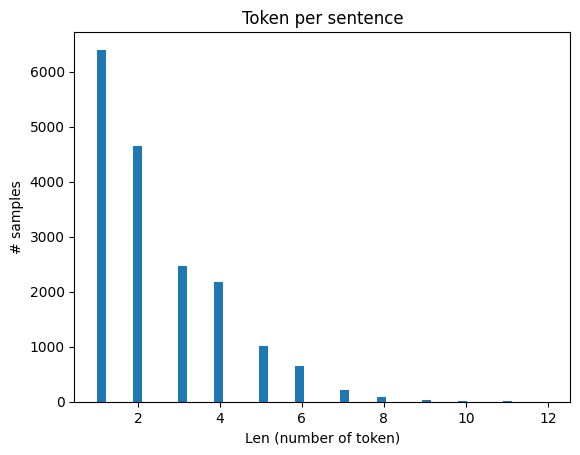

In [ ]:
# Plot sentence by lenght
plt.hist([len(s) for s in sentences], bins=50)
plt.title('Token per sentence')
plt.xlabel('Len (number of token)')
plt.ylabel('# samples')
plt.show()

In [ ]:
from numpy import max
maxl = max([len(s) for s in sentences])
print ('Maximum sequence length in the list of sentences:', maxl)

Maximum sequence length in the list of sentences: 12


In [ ]:
for s in sentences:
  if len(s) == maxl:
    print(s)

[('special', 'B-RNAME'), ('offer', 'I-RNAME'), ('-', 'I-RNAME'), ('non', 'I-RNAME'), ('refundable', 'I-RNAME'), ('-', 'I-RNAME'), ('suite', 'I-RNAME'), ('toits', 'I-RNAME'), ('de', 'I-RNAME'), ('paris', 'I-RNAME'), ('(complimentary', 'I-RNAME'), ('champagne)', 'I-RNAME')]
[('special', 'B-RACAT'), ('offer', 'I-RACAT'), ('-', 'I-RACAT'), ('non', 'I-RACAT'), ('refundable', 'I-RACAT'), ('-', 'I-RACAT'), ('suite', 'I-RACAT'), ('toits', 'I-RACAT'), ('de', 'I-RACAT'), ('paris', 'I-RACAT'), ('complimentary', 'I-RACAT'), ('champagne', 'I-RACAT')]
[('special', 'B-RACAT'), ('offer', 'I-RACAT'), ('-', 'I-RACAT'), ('non', 'I-RACAT'), ('refundable', 'I-RACAT'), ('-', 'I-RACAT'), ('suite', 'I-RACAT'), ('toits', 'I-RACAT'), ('de', 'I-RACAT'), ('paris', 'I-RACAT'), ('complimentary', 'I-RACAT'), ('champagne', 'I-RACAT')]


In [ ]:
from future.utils import iteritems

word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

idx2tag = {v: k for k, v in iteritems(tag2idx)}

In [ ]:
idx2tag

{0: 'B-CATTYPE',
 1: 'B-NIGHTS',
 2: 'B-RNAME',
 3: 'I-RACAT',
 4: 'I-OCC',
 5: 'B-RACAT',
 6: 'I-RNAME',
 7: 'I-FPR',
 8: 'I-RONAME',
 9: 'B-OCC',
 10: 'B-INCL',
 11: 'B-TAXCAT',
 12: 'I-NIGHTS',
 13: 'B-FPR',
 14: 'I-CURR',
 15: 'I-STAR',
 16: 'I-HOTNAME',
 17: 'O',
 18: 'B-PTYPE',
 19: 'B-TAXVAL',
 20: 'B-PR',
 21: 'I-TAXCAT',
 22: 'I-PTYPE',
 23: 'I-CATTYPE',
 24: 'B-SLD',
 25: 'B-CURR',
 26: 'B-RONAME',
 27: 'I-INCL',
 28: 'B-HOTNAME',
 29: 'B-STAR',
 30: 'I-PR',
 31: 'ENDPAD'}

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = [[word2idx[w[0]] for w in s] for s in sentences]
X

[[384],
 [1111],
 [948],
 [882],
 [379],
 [496],
 [1588],
 [1030],
 [781, 1726],
 [1195],
 [1756],
 [334],
 [458],
 [1114],
 [1637],
 [1111],
 [1742],
 [1495],
 [1726],
 [2141],
 [998, 237],
 [1021],
 [1745, 1842],
 [2045],
 [53],
 [140],
 [1726],
 [1195],
 [1952],
 [1940],
 [1363, 1726],
 [1632],
 [1111],
 [1157],
 [1021, 1632, 681],
 [1371, 862],
 [1533],
 [496],
 [379, 750],
 [1111],
 [496],
 [1111],
 [956],
 [1015],
 [1935],
 [1662, 934, 1553],
 [2141],
 [1274],
 [461],
 [1111],
 [681, 461],
 [1671],
 [1900],
 [1122],
 [1381],
 [1221, 2141, 379],
 [230],
 [325],
 [27],
 [662],
 [686, 1786],
 [1908],
 [2144, 2149, 970, 89],
 [1908],
 [686, 1786],
 [1856],
 [1016, 668],
 [645],
 [1016],
 [1290, 26],
 [462],
 [686, 1052, 1042, 1022],
 [1366],
 [2027],
 [1763],
 [1042],
 [1590, 379, 916],
 [679, 681, 2141],
 [75],
 [906, 954],
 [1862],
 [965, 2050, 1110, 1839, 225],
 [1240],
 [2141],
 [2141],
 [1310],
 [379],
 [2141],
 [1310],
 [1310],
 [2141, 379],
 [2141, 379],
 [379, 2141],
 [1310],

In [ ]:
X = pad_sequences(maxlen=maxl, sequences=X, padding="post",value=n_words - 1)
X

array([[ 384, 2162, 2162, ..., 2162, 2162, 2162],
       [1111, 2162, 2162, ..., 2162, 2162, 2162],
       [ 948, 2162, 2162, ..., 2162, 2162, 2162],
       ...,
       [1628, 2162, 2162, ..., 2162, 2162, 2162],
       [1628, 2162, 2162, ..., 2162, 2162, 2162],
       [1628, 2162, 2162, ..., 2162, 2162, 2162]], dtype=int32)

In [ ]:
 y = [[tag2idx[w[1]] for w in s] for s in sentences]
 y

[[17],
 [17],
 [17],
 [17],
 [17],
 [17],
 [17],
 [17],
 [17, 17],
 [17],
 [17],
 [17],
 [17],
 [17],
 [17],
 [17],
 [17],
 [17],
 [17],
 [17],
 [17, 17],
 [17],
 [17, 17],
 [17],
 [17],
 [17],
 [17],
 [17],
 [17],
 [17],
 [17, 17],
 [17],
 [17],
 [17],
 [17, 17, 17],
 [17, 17],
 [17],
 [17],
 [17, 17],
 [17],
 [17],
 [17],
 [17],
 [17],
 [17],
 [17, 17, 17],
 [17],
 [17],
 [17],
 [17],
 [17, 17],
 [17],
 [17],
 [25],
 [17],
 [17, 17, 17],
 [17],
 [17],
 [17],
 [17],
 [1, 12],
 [17],
 [17, 17, 17, 17],
 [17],
 [1, 12],
 [17],
 [17, 17],
 [17],
 [17],
 [17, 17],
 [17],
 [9, 4, 4, 4],
 [17],
 [17],
 [17],
 [17],
 [28, 16, 16],
 [17, 17, 17],
 [17],
 [17, 17],
 [17],
 [17, 17, 17, 17, 17],
 [17],
 [17],
 [17],
 [17],
 [17],
 [17],
 [17],
 [17],
 [17, 17],
 [17, 17],
 [17, 17],
 [17],
 [17],
 [17],
 [28, 16, 16],
 [17],
 [29, 15, 15],
 [17],
 [29, 15, 15],
 [17],
 [17, 17],
 [17],
 [17],
 [17],
 [11, 21, 10, 27],
 [11, 21, 10, 27],
 [17],
 [17],
 [17],
 [17, 17, 17],
 [9, 4, 4, 4],
 [17],


In [ ]:
y = pad_sequences(maxlen=maxl, sequences=y, padding="post", value=tag2idx["ENDPAD"])
y

array([[17, 31, 31, ..., 31, 31, 31],
       [17, 31, 31, ..., 31, 31, 31],
       [17, 31, 31, ..., 31, 31, 31],
       ...,
       [29, 31, 31, ..., 31, 31, 31],
       [29, 31, 31, ..., 31, 31, 31],
       [29, 31, 31, ..., 31, 31, 31]], dtype=int32)

In [ ]:
#This is the length of longest sequence in the list os sentences. So this should be our size of max_padding
maxl

12

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
y_test

array([[26,  8,  8, ..., 31, 31, 31],
       [ 5, 31, 31, ..., 31, 31, 31],
       [25, 31, 31, ..., 31, 31, 31],
       ...,
       [17, 31, 31, ..., 31, 31, 31],
       [ 1, 12, 31, ..., 31, 31, 31],
       [25, 31, 31, ..., 31, 31, 31]], dtype=int32)

In [ ]:
x_train.shape

(14176, 12)

In [ ]:
y_train.shape

(14176, 12)

In [ ]:
import keras.utils
from tensorflow.keras.utils import to_categorical

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes=n_tags)

In [ ]:
y_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
print(x_train.shape, y_train.shape)

(14176, 12) (14176, 12, 32)


In [ ]:
print(x_test.shape, y_test.shape)

(3545, 12) (3545, 12)


In [ ]:
y_test = to_categorical(y_test,num_classes=n_tags)

In [ ]:
print(x_test.shape, y_test.shape)

(3545, 12) (3545, 12, 32)


In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 58.0 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras import Model, Input,Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional
from keras.layers import TimeDistributed, Dropout, Bidirectional
from numpy import shape
from sklearn_crfsuite import CRF

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback
from keras_contrib.layers import CRF
import keras as k

## **Hyperparameters Fine Tuning**

In [ ]:
'''from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# Créez une fonction qui construit le modèle BiLSTM
def build_model(units=64, dropout=0.5, batch_size=32, epochs=10):
    input = Input(shape=(maxl,))
    word_embedding_size = 300
    model = Embedding(input_dim=n_words, output_dim=word_embedding_size, input_length=maxl)(input)
    model = SpatialDropout1D(0.1)(model)
    model = Bidirectional(LSTM(units=units, return_sequences=True, recurrent_dropout=dropout))(model)
    output = TimeDistributed(Dense(n_tags, activation="softmax"))(model)
    model = Model(input, output)
    model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# Créez un modèle KerasClassifier
model = KerasClassifier(build_fn=build_model)

# Définissez les hyperparamètres à ajuster avec leurs plages de valeurs
param_grid = {
    'units': [64, 128, 256],
    'dropout': [0.2, 0.3, 0.5],
    'batch_size': [32, 64],
    'epochs': [10, 20]
}

# Utilisez GridSearchCV pour la recherche exhaustive
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search_result = grid_search.fit(x_train, y_train)

# Affichez les meilleurs hyperparamètres et les résultats associés
print("Meilleurs hyperparamètres : ", grid_search_result.best_params_)
print("Meilleur score : ", grid_search_result.best_score_)'''


In [ ]:
'''from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras_contrib.layers import CRF
from tensorflow.keras.layers import LSTM, Embedding, Dense, SpatialDropout1D, Bidirectional
from tensorflow.keras.models import Model
from numpy import shape

# Créez une fonction qui construit le modèle BiLSTM
def build_model(units=64, dropout=0.5, batch_size=32, epochs=10):
    input = Input(shape=(maxl,))
    model = Embedding(input_dim=n_words, output_dim=300, input_length=maxl)(input)
    model = SpatialDropout1D(0.1)(model)
    model = Bidirectional(LSTM(units=units, return_sequences=True, recurrent_dropout=dropout))(model)
    output = TimeDistributed(Dense(n_tags, activation="relu"))(model)
    model = Model(input, output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Créez un modèle KerasClassifier
model = KerasClassifier(build_fn=build_model)

# Définissez les hyperparamètres à ajuster avec leurs plages de valeurs
param_dist = {
    'units': [150, 200, 250],
    'dropout': [0.2, 0.3, 0.5],
    'batch_size': [32, 64],
    'epochs': [10, 20]
}

# Utilisez RandomizedSearchCV pour la recherche aléatoire
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3)
random_search_result = random_search.search(x_train, y_train)

# Affichez les meilleurs hyperparamètres et les résultats associés
print("Meilleurs hyperparamètres trouvés :")
print(random_search_result.best_params_)
print("Meilleur score : {:.2f}".format(random_search_result.best_score_))'''

'from sklearn.model_selection import RandomizedSearchCV\nfrom keras.wrappers.scikit_learn import KerasClassifier\nfrom keras_contrib.layers import CRF\nfrom tensorflow.keras.layers import LSTM, Embedding, Dense, SpatialDropout1D, Bidirectional\nfrom tensorflow.keras.models import Model\nfrom numpy import shape\n\n# Créez une fonction qui construit le modèle BiLSTM\ndef build_model(units=64, dropout=0.5, batch_size=32, epochs=10):\n    input = Input(shape=(maxl,))\n    model = Embedding(input_dim=n_words, output_dim=300, input_length=maxl)(input)\n    model = SpatialDropout1D(0.1)(model)\n    model = Bidirectional(LSTM(units=units, return_sequences=True, recurrent_dropout=dropout))(model)\n    output = TimeDistributed(Dense(n_tags, activation="relu"))(model)\n    model = Model(input, output)\n    model.compile(optimizer=\'adam\', loss=\'categorical_crossentropy\', metrics=[\'accuracy\'])\n    return model\n\n# Créez un modèle KerasClassifier\nmodel = KerasClassifier(build_fn=build_model

In [ ]:
import numpy as np
from kerastuner.tuners import RandomSearch
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, SpatialDropout1D, Bidirectional, TimeDistributed
from tensorflow.keras.models import Model
from kerastuner import HyperParameters

# Créez une fonction qui construit le modèle BiLSTM
def build_model(hp):
    input = Input(shape=(maxl,))
    model = Embedding(input_dim=n_words, output_dim=300, input_length=maxl)(input)
    model = SpatialDropout1D(0.1)(model)
    model = Bidirectional(LSTM(units=hp.Int('units', min_value=150, max_value=250, step=50),
                               return_sequences=True,
                               recurrent_dropout=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))(model)
    output = TimeDistributed(Dense(n_tags, activation="relu"))(model)
    model = Model(input, output)

      # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model


# Créez un tuner RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Nombre d'essais aléatoires
    executions_per_trial=1,  # Nombre d'exécutions par essai
    #directory='my_dir'  # Dossier pour enregistrer les résultats

)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Recherchez les meilleurs hyperparamètres
tuner.search(x_train, y_train, epochs=20, validation_split=0.2, batch_size=32, callbacks=[stop_early])

# Affichez les meilleurs hyperparamètres et les résultats associés
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Meilleurs hyperparamètres trouvés :")
print(best_hps.values)


Trial 2 Complete [00h 00m 13s]

Best val_accuracy So Far: None
Total elapsed time: 00h 00m 23s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
200               |150               |units
0.4               |0.4               |dropout
0.001             |0.0001            |learning_rate



Epoch 1/20


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, i

RuntimeError: ignored

In [ ]:
#y_train = np.argmax(y_train, axis=-1)

In [ ]:
y_train.shape

## **Training**

In [ ]:
pip install tf2crf

**Default:  150 , 0.1**

**BEST params : units = 200 , dropout = 0.4**

In [ ]:
from tf2crf import CRF
from tf2crf import CRF, ModelWithCRFLoss

input=Input(shape=(maxl,))
model=Embedding(input_dim=n_words,output_dim=maxl,input_length=maxl)(input)
model=SpatialDropout1D(0.1)(model)
model=Bidirectional(LSTM(units=200,return_sequences=True, recurrent_dropout=0.4))(model)
output=TimeDistributed(Dense(n_tags, activation="softmax"))(model)

'''crf = CRF(n_tags)
output = crf(model)

base_model = Model(input, output)
model = ModelWithCRFLoss(base_model, sparse_target=True)'''

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


'crf = CRF(n_tags)\noutput = crf(model)\n\nbase_model = Model(input, output)\nmodel = ModelWithCRFLoss(base_model, sparse_target=True)'

In [ ]:
model = Model(input, output)

In [ ]:
#this one Works
'''from tf2crf import CRF
from tf2crf import CRF, ModelWithCRFLoss

input = Input(shape=(maxl,))
word_embedding_size = 300
model = Embedding(input_dim=n_words, output_dim=word_embedding_size, input_length=maxl)(input)
model = Bidirectional(LSTM(units=word_embedding_size,
                           return_sequences=True,
                           dropout=0.5,
                           recurrent_dropout=0.5,
                           kernel_initializer=k.initializers.he_normal()))(model)
model = LSTM(units=word_embedding_size * 2,
             return_sequences=True,
             dropout=0.5,
             recurrent_dropout=0.5,
             kernel_initializer=k.initializers.he_normal())(model)
model = TimeDistributed(Dense(n_tags, activation="relu"))(model)

crf = CRF(n_tags)  # CRF layer
out = crf(model)

base_model = Model(input, out)
model = ModelWithCRFLoss(base_model, sparse_target=True)'''

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, np.array(y_train), batch_size=32, epochs=10, validation_split=0.2,verbose=1)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/10
355/355 [==============================] - 87s 219ms/step - loss: 0.7525 - accuracy: 0.8198 - val_loss: 0.4255 - val_accuracy: 0.8593
Epoch 2/10
355/355 [==============================] - 41s 116ms/step - loss: 0.3364 - accuracy: 0.8935 - val_loss: 0.2259 - val_accuracy: 0.9337
Epoch 3/10
355/355 [==============================] - 45s 127ms/step - loss: 0.1945 - accuracy: 0.9448 - val_loss: 0.1285 - val_accuracy: 0.9699
Epoch 4/10
355/355 [==============================] - 42s 119ms/step - loss: 0.1186 - accuracy: 0.9713 - val_loss: 0.0827 - val_accuracy: 0.9820
Epoch 5/10
355/355 [==============================] - 42s 118ms/step - loss: 0.0781 - accuracy: 0.9818 - val_loss: 0.0632 - val_accuracy: 0.9860
Epoch 6/10
355/355 [==============================] - 41s 114ms/step - loss: 0.0563 - accuracy: 0.9861 - val_loss: 0.0437 - val_accuracy: 0.9905
Epoch 7/10
355/355 [==============================] - 38s 108ms/step - loss: 0.0418 - accuracy: 0.9894 - val_loss: 0.0375 - val_ac

In [ ]:
#early_stop= EarlyStopping(monitor='val_accuracy',patience=1,verbose=1,mode='max',restore_best_weights=False)
#callbacks=[PlotLossesCallback(),early_stop]

#history=model.fit(x_train,np.array(y_train),validation_split=0.2,batch_size=32,epochs=10,verbose=1)


In [ ]:
print(k.__version__)

In [ ]:
#history = ner_model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=MAX_EPOCHS, validation_split=0.1, verbose=2)

In [ ]:
#model.summary()

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['val_loss']
    val_loss = history.history['loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

In [ ]:
model.evaluate(x_test,np.array(y_test))

## **Evaluation**

### **F1 Score**

In [ ]:
test_pred = model.predict(x_test, verbose=1)
idx2tag = {i: w for w, i in tag2idx.items()}

def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PAD", "O"))
        out.append(out_i)
    return out

pred_labels = pred2label(test_pred)
test_labels = pred2label(y_test)

In [ ]:
'''from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
print("F1-score: ", f1_score(test_labels, pred_labels, average='macro'))'''

In [ ]:
from sklearn_crfsuite.metrics import flat_f1_score

f1_score = flat_f1_score(test_labels, pred_labels, average='weighted')
f1_score

In [ ]:
from sklearn_crfsuite.metrics import flat_f1_score

f1_score = flat_f1_score(test_labels, pred_labels, average='macro')
f1_score

### **Classification Report**

In [ ]:
# Eval
pred_cat = model.predict(x_test)
pred = np.argmax(pred_cat, axis=-1)
y_test_true = np.argmax(y_test, -1)

In [ ]:
y_test_true

In [ ]:
'''from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.metrics import classification_report

# Convert the index to tag
pred_tag = [[idx2tag[i] for i in row] for row in pred]
y_test_true_tag = [[idx2tag[i] for i in row] for row in y_test_true]

report = flat_classification_report(y_pred=pred_tag, y_true=y_test_true_tag)
print(report)'''

In [ ]:
'''from sklearn.metrics import classification_report


# Generate the classification report
report = classification_report(pred_tag, y_test_true_tag)

print(report)'''

In [ ]:
from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.metrics import classification_report

# Flatten the y_test_true and pred to convert them into 1D arrays
y_test_true_flat = [item for sublist in y_test_true for item in sublist]
pred_flat = [item for sublist in pred for item in sublist]

# Convert the indices to tag labels for y_test_true_flat and pred_flat
y_test_true_tag = [idx2tag[i] for i in y_test_true_flat]
pred_tag = [idx2tag[i] for i in pred_flat]

# Generate the classification report
report = classification_report(y_test_true_tag, pred_tag)
print(report)

In [ ]:
'''from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.metrics import classification_report

# Faites des prédictions sur les données de test
pred_cat = model.predict(x_test)
pred = np.argmax(pred_cat, axis=-1)
y_test_true = np.argmax(y_test, -1)

# Convertissez les indices en étiquettes de tags pour y_test_true et pred
y_test_true_tag = [[idx2tag[i] for i in seq] for seq in y_test_true]
pred_tag = [idx2tag[i] for i in pred]  # Utilisez simplement pred

# Get the unique labels from your Y (ground truth) data
unique_labels = set([label for seq in y_test_true for label in seq])
# Convert the unique labels to a list
unique_labels_list = list(unique_labels)

# Générez le rapport de classification avec sklearn_crfsuite.metrics
report = flat_classification_report(y_test_true_tag, pred_tag)
print("Rapport de classification :\n", report)
'''

In [ ]:
!pip install --force-reinstall --no-dependencies "scikit-learn==0.24.2"

In [ ]:
y_pred_train = model.predict(x_train)

y_pred2_train = np.argmax(y_pred_train, axis=2)

y_train2 = np.argmax(y_train, axis=2)


In [ ]:
y_train2

### **Confusion Matrix**

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
def tag_conf_matrix(cm, tagid):

    tag_name = idx2tag[tagid]
    print("Tag name: {}".format(tag_name))
    print(cm[tagid])
    tn, fp, fn, tp = cm[tagid].ravel()
    tag_acc = (tp + tn) / (tn + fp + fn + tp)
    #print("Tag accuracy: {:.3f} \n".format(tag_acc))

matrix = multilabel_confusion_matrix(y_test_true.flatten(), pred.flatten())

for tag_id in range(len(idx2tag)):
    tag_conf_matrix(matrix, tag_id)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Prédictions sur les données de test
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)  # Convertir les probabilités en indices de classe

# Convertir les étiquettes réelles en indices de classe
y_true = np.argmax(y_test, axis=-1)

# Calculer la matrice de confusion
confusion_mat = confusion_matrix(y_true.flatten(), y_pred.flatten())

# Étiquettes de classe
class_labels = list(tag2idx.keys())


plt.figure(figsize=(15, 10))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Prédiction")
plt.ylabel("Vraie étiquette")
plt.title("Matrice de confusion")
plt.show()

In [ ]:
# Calculer le total des vrais positifs (somme des éléments diagonaux)
total_true_positives = np.trace(confusion_mat)

# Afficher le résultat
print("Total des vrais positifs :", total_true_positives)

In [ ]:
df_undersampled[df_undersampled['label'] == "PRICE"].head(50)

### **Predictions**

In [ ]:
# Exemple de nouvelles données sous forme de séquences de mots (liste de listes)
new_data = [
    ["room only"],
    ["central", "hotel", "fort-de-france"],
    ["9.4"],
    ["€92"],
    ["non-smoking","room"],
    ["chf 200.50"],
    ["breakfast"]

]

# Convertir les mots en indices à l'aide du dictionnaire word2idx
new_data_indices = [[word2idx.get(word, n_words - 1) for word in sentence] for sentence in new_data]

# Rembourrer les séquences de mots pour qu'elles aient la même longueur que les séquences d'entraînement
new_data_padded = pad_sequences(maxlen=maxl, sequences=new_data_indices, padding="post", value=n_words - 1)

# Faire les prédictions sur les nouvelles données
predictions = model.predict(new_data_padded)

# Convertir les probabilités en étiquettes prédites (indices de classe)
predicted_labels = np.argmax(predictions, axis=-1)

# Convertir les indices de classe en étiquettes textuelles à l'aide du dictionnaire idx2tag
predicted_tags = [[idx2tag[idx] for idx in sentence] for sentence in predicted_labels]

# Afficher les prédictions
for i, sentence in enumerate(new_data):
    print("Phrase:", " ".join(sentence))
    print("Prédiction:", " ".join(predicted_tags[i]))
    print()


# **Second Step : Détection des balises HTML**

### **1) Extraction du texte a partir du code HTML**

In [ ]:
pip install html2text

In [ ]:
import html2text

html_path = "/content/traveloka1.txt"

f = open(html_path)
text = f.read()
f.close()

h = html2text.HTML2Text()
h.ignore_links = True

clean_text=h.handle(text)
sentences = clean_text.split('\n')

sentences

['![](https://d1785e74lyxkqq.cloudfront.net/_next/static/v2/5/5391d86e5f4c5e92de04ef4461a09259.svg)',
 '',
 '![](https://d1785e74lyxkqq.cloudfront.net/_next/static/v2/9/97f3e7a54e9c6987283b78e016664776.svg)',
 '',
 'Download App',
 '',
 '![](https://d1785e74lyxkqq.cloudfront.net/_next/static/v2/a/abdf7b00a3ad782bbad1f00c298a3c30.svg)',
 '',
 '![](https://d1785e74lyxkqq.cloudfront.net/_next/static/v2/a/a5b77c2fab5e454e3271588503cd94d9.svg)',
 '',
 'Partner with Us',
 '',
 '![](https://d1785e74lyxkqq.cloudfront.net/_next/static/v2/6/687f7095ed36a75c21cc52726d55b2c5.svg)',
 '',
 'Saved',
 '',
 '![](https://d1785e74lyxkqq.cloudfront.net/_next/static/v2/8/8c9954122d8006592fbcbd4a82ac994c.svg)',
 '',
 'My Booking',
 '',
 '![](https://d1785e74lyxkqq.cloudfront.net/_next/static/v2/2/225a4c290e89ee22a80b21c45e12dd1e.svg)',
 '',
 'IDR',
 '',
 '![](https://d1785e74lyxkqq.cloudfront.net/_next/static/v2/a/abdf7b00a3ad782bbad1f00c298a3c30.svg)',
 '',
 '![](https://d1785e74lyxkqq.cloudfront.net/_next

In [ ]:
for sentence in sentences:
  print(type(sentence))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

### **2) Création du Dataframe pour stocker les phrases**

In [ ]:
# Supprimer les espaces inutiles des phrases et les lignes vides
sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

# Creation du DataFrame
data = {"Sentence": sentences}
df = pd.DataFrame(data)

df

Sentence
0     ![](https://d1785e74lyxkqq.cloudfront.net/_nex...
1     ![](https://d1785e74lyxkqq.cloudfront.net/_nex...
2                                          Download App
3     ![](https://d1785e74lyxkqq.cloudfront.net/_nex...
4     ![](https://d1785e74lyxkqq.cloudfront.net/_nex...
...                                                 ...
1456                                       Rp 6.185.950
1457                                     Taxes and fees
1458                                       Rp 1.299.050
1459                                      Total payment
1460                                       Rp 7.485.000

[1461 rows x 1 columns]

### **3) Nettoyage des données**

In [ ]:
# Vérifier si le DataFrame contient des valeurs manquantes (lignes vides)
if df["Sentence"].isna().any():
    print("Le DataFrame contient des lignes vides.")
else:
    print("Le DataFrame ne contient pas de lignes vides.")


Le DataFrame ne contient pas de lignes vides.


In [ ]:
import pandas as pd
import re

# Créer une liste pour stocker les phrases filtrées
filtered_sentences = []

# Liste de mots clés pour les commentaires et opinions
comment_keywords = ["comment", "opinion"]

# Liste d'extensions d'images à exclure
image_extensions = [".jpeg", ".jpg", ".png", ".gif"]

# Filtrer les phrases pour exclure les commentaires, opinions et liens d'images
for sentence in sentences:
    if "http" not in sentence:

        if not any(keyword in sentence.lower() for keyword in comment_keywords):

            if not any(extension in sentence.lower() for extension in image_extensions):
                filtered_sentences.append(sentence)


# Créer un DataFrame à partir des phrases filtrées
df = pd.DataFrame(filtered_sentences, columns=["Sentence"])

df


Sentence
0        Download App
1     Partner with Us
2               Saved
3          My Booking
4                 IDR
...               ...
1069     Rp 6.185.950
1070   Taxes and fees
1071     Rp 1.299.050
1072    Total payment
1073     Rp 7.485.000

[1074 rows x 1 columns]

### **4) Prédictions avec BiLSTM**

In [ ]:
# Mettre en minuscules les valeurs de la colonne "sentences"
df['Sentence'] = df['Sentence'].str.lower()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convertir les phrases en séquences d'indices
sentence_sequences = [[word2idx.get(token, word2idx["ENDPAD"]) for token in sentence.split()] for sentence in df["Sentence"]]

# Appliquer le padding aux séquences
padded_sequences = pad_sequences(sentence_sequences, maxlen=maxl, padding="post", value=n_words - 1)

# Faire des prédictions avec le modèle
predictions = model.predict(padded_sequences)

# Obtenir les indices de tag prédits pour chaque séquence
predicted_tag_indices = predictions.argmax(axis=-1)

# Convertir les indices de tag en tags réels
predicted_tags = [[idx2tag[idx] for idx in sequence] for sequence in predicted_tag_indices]



26/26 [==============================] - 1s 18ms/step


In [ ]:
df["Predicted_Tags"] = predicted_tags

In [ ]:
df

Sentence                                            balises  \
0        download app  {'parent': ['Download App'], 'previous_element...   
1     partner with us  {'parent': ['Partner with Us'], 'previous_elem...   
2               saved  {'parent': ['Saved'], 'previous_element': ['Sa...   
3          my booking  {'parent': ['My Booking'], 'previous_element':...   
4                 idr  {'parent': ['IDR'], 'previous_element': ['IDR'...   
...               ...                                                ...   
1069     rp 6.185.950  {'parent': ['Rp 6.185.950'], 'previous_element...   
1070   taxes and fees  {'parent': ['Taxes and fees'], 'previous_eleme...   
1071     rp 1.299.050  {'parent': ['Rp 1.299.050'], 'previous_element...   
1072    total payment  {'parent': ['{"props":{"pageProps":{"rawAppCon...   
1073     rp 7.485.000  {'parent': ['Rp 7.485.000'], 'previous_element...   

                                         Predicted_Tags  
0     [O, O, ENDPAD, ENDPAD, ENDPAD, ENDPAD, ENDPAD,...  
1     [O, O, O, ENDPAD, ENDPAD, ENDPAD, ENDPAD, ENDP...  
2     [O, ENDPAD, ENDPAD, ENDPAD, ENDPAD, ENDPAD, EN...  
3     [O, O, ENDPAD, ENDPAD, ENDPAD, ENDPAD, ENDPAD,...  
4     [O, ENDPAD, ENDPAD, ENDPAD, ENDPAD, ENDPAD, EN...  
...                                                 ...  
1069  [B-PR, I-PR, ENDPAD, ENDPAD, ENDPAD, ENDPAD, E...  
1070  [B-STAR, I-CURR, ENDPAD, ENDPAD, ENDPAD, ENDPA...  
1071  [B-PR, I-PR, ENDPAD, ENDPAD, ENDPAD, ENDPAD, E...  
1072  [B-HOTNAME, I-HOTNAME, ENDPAD, ENDPAD, ENDPAD,...  
1073  [B-PR, I-PR, ENDPAD, ENDPAD, ENDPAD, ENDPAD, E...  

[825 rows x 3 columns]

In [ ]:
df.iloc[200:215]

Sentence  \
229  extra flexibility: get this room with no immed...   
230                                       rp 1.313.333   
231                                         rp 985.000   
233                                 inclusive of taxes   
234                                          book now!   
235                                          book now!   
236                 see 2 more options for deluxe twin   
237                          deluxe queen simpang lima   
238         asset/dgxfoyh24ryqlrcgq00cidkhrmotrwlnlvg-   
239                                                1/4   
240         asset/dgxfoyh24ryqlrcgq00cidkhrmotrwlnlvg-   
241         asset/dgxfoyh24ryqlrcgq00cidkhrmotrwlnlvg-   
242         asset/dgxfoyh24ryqlrcgq00cidkhrmotrwlnlvg-   
243                                           26.0 sqm   
244                                            bathtub   

                                               balises  \
229  {'parent': ['Extra flexibility: Get this room ...   
230  {'parent': ['Rp 1.313.333'], 'previous_element...   
231  {'parent': ['Rp 985.000'], 'previous_element':...   
233  {'parent': ['Inclusive of Taxes'], 'previous_e...   
234  {'parent': ['Book Now!'], 'previous_element': ...   
235  {'parent': ['Book Now!'], 'previous_element': ...   
236  {'parent': ['See 2 more options for Deluxe Twi...   
237  {'parent': ['{"@context":"https://schema.org",...   
238  {'parent': ['{"@context":"http://schema.org/",...   
239  {'parent': ['1/4'], 'previous_element': ['1/4'...   
240  {'parent': ['{"@context":"http://schema.org/",...   
241  {'parent': ['{"@context":"http://schema.org/",...   
242  {'parent': ['{"@context":"http://schema.org/",...   
243  {'parent': ['26.0 sqm'], 'previous_element': [...   
244  {'parent': ['Bathtub'], 'previous_element': ['...   

                                        Predicted_Tags  
229  [B-RACAT, ENDPAD, I-RACAT, I-RACAT, I-RNAME, I...  
230  [B-PR, I-PR, ENDPAD, ENDPAD, ENDPAD, ENDPAD, E...  
231  [B-PR, I-PR, ENDPAD, ENDPAD, ENDPAD, ENDPAD, E...  
233  [B-FPR, I-FPR, ENDPAD, ENDPAD, ENDPAD, ENDPAD,...  
234  [O, ENDPAD, ENDPAD, ENDPAD, ENDPAD, ENDPAD, EN...  
235  [O, ENDPAD, ENDPAD, ENDPAD, ENDPAD, ENDPAD, EN...  
236  [O, O, O, ENDPAD, I-RNAME, I-RNAME, I-RNAME, E...  
237  [B-RONAME, I-RONAME, I-RONAME, I-RONAME, ENDPA...  
238  [B-STAR, ENDPAD, ENDPAD, ENDPAD, ENDPAD, ENDPA...  
239  [B-STAR, ENDPAD, ENDPAD, ENDPAD, ENDPAD, ENDPA...  
240  [B-STAR, ENDPAD, ENDPAD, ENDPAD, ENDPAD, ENDPA...  
241  [B-STAR, ENDPAD, ENDPAD, ENDPAD, ENDPAD, ENDPA...  
242  [B-STAR, ENDPAD, ENDPAD, ENDPAD, ENDPAD, ENDPA...  
243  [B-STAR, I-PR, ENDPAD, ENDPAD, ENDPAD, ENDPAD,...  
244  [O, ENDPAD, ENDPAD, ENDPAD, ENDPAD, ENDPAD, EN...

In [ ]:
sentences = df["Sentence"].tolist()
sentences[200:215]

['extra flexibility: get this room with no immediate payment.',
 'rp 1.313.333',
 'rp 985.000',
 'inclusive of taxes',
 'book now!',
 'book now!',
 'see 2 more options for deluxe twin',
 'deluxe queen simpang lima',
 'asset/dgxfoyh24ryqlrcgq00cidkhrmotrwlnlvg-',
 '1/4',
 'asset/dgxfoyh24ryqlrcgq00cidkhrmotrwlnlvg-',
 'asset/dgxfoyh24ryqlrcgq00cidkhrmotrwlnlvg-',
 'asset/dgxfoyh24ryqlrcgq00cidkhrmotrwlnlvg-',
 '26.0 sqm',
 'bathtub']

### **5) Localisation des phrases dans le fichier HTML (Détection des balises HTML)**

In [ ]:
from bs4 import BeautifulSoup
html_path = "/content/traveloka1.txt"

file = open(html_path)
html_content = file.read()
soup = BeautifulSoup(html_content, 'html.parser')

balises = []

for index, row in df.iterrows():
  try:
    pattern = re.compile(row["Sentence"])
    balises.append(soup.find(text=pattern).__dict__)
    matching_tag = soup.find(text=pattern).parent

    # Get the previous and next siblings of the matching tag
    previous = soup.find(text=pattern).previous_element
    next = soup.find(text=pattern).next_element


    print(f"Sentence: {row['Sentence']}")
    print("Balise:")
    print(matching_tag)
    print("=" * 50)

    if previous:
            print("Previous Element:")
            print(previous)
    print("=" * 30)

    if next:
            print("Next Element:")
            print(next)
    print("=" * 150)

  except:
    df.drop(index,axis=0,inplace=True)
    index = index + 1
    print(f"Sentence: {row['Sentence']}")
    print("No matching balise found")
    print("=" * 150)

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'tex

Sentence: Download App
Balise:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="color:rgba(3,18,26,1.00);margin-right:4px;margin-left:4px">Download App</div>
Previous Element:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="color:rgba(3,18,26,1.00);margin-right:4px;margin-left:4px">Download App</div>
Next Element:
<img decoding="async" height="12" importance="low" loading="lazy" src="https://d1785e74lyxkqq.cloudfront.net/_next/static/v2/a/abdf7b00a3ad782bbad1f00c298a3c30.svg" style="object-fit:fill;object-position:50% 50%" width="12"/>
Sentence: Partner with Us
Balise:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="color:rgba(3,18,26,1.00)">Partner with Us</div>
Previous Element:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="color:rgba(3,18,26,1.00)">Partner with Us</div>
Next Element:
<a class="css-4rbku5 r-1awozwy r-6koa

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'tex


Previous Element:
<div class="css-901oao css-cens5h r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-1t01tom r-fdjqy7" dir="auto" style="-webkit-line-clamp: 2; color: rgb(3, 18, 26);">Friendly staff, clean room, next to the mall, stategic location, Small pool, nice lobby</div>
Next Element:
<div class="css-1dbjc4n r-18u37iz r-1t01tom"><img src="https://d1785e74lyxkqq.cloudfront.net/_next/static/v2/a/ae73fa0a5c08e7064d9dafe34d1408e8.svg"/><div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-135wba7 r-19u6a5r r-fdjqy7" dir="auto" style="color: rgb(3, 18, 26);">Masniari K. </div></div>
Sentence: Masniari K.
Balise:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-135wba7 r-19u6a5r r-fdjqy7" dir="auto" style="color: rgb(3, 18, 26);">Masniari K. </div>
Previous Element:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-135wba7 r-19u6a5r r-fdjqy7" dir="auto" style="color: rgb(3, 18, 26);">Masniari K. </div>
Next Element:
<div aria-hidden="true" data-swipeable="true" style="width: 360px; fl

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'tex


Balise:
<div class="css-901oao r-1ud240a r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7 r-3s2u2q" dir="auto">1.27 km</div>
Previous Element:
<div class="css-901oao r-1ud240a r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7 r-3s2u2q" dir="auto">1.27 km</div>
Next Element:
<div class="css-1dbjc4n" style="padding-bottom: 12px;"></div>
Sentence: Semarang Poncol Station
Balise:
<div class="css-901oao r-1sixt3s r-1b43r93 r-b88u0q r-rjixqe r-15zivkp r-fdjqy7" dir="auto" style="color: rgb(3, 18, 26);">Semarang Poncol Station</div>
Previous Element:
<div class="css-901oao r-1sixt3s r-1b43r93 r-b88u0q r-rjixqe r-15zivkp r-fdjqy7" dir="auto" style="color: rgb(3, 18, 26);">Semarang Poncol Station</div>
Next Element:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="color: rgb(3, 18, 26);">Transportation Hub</div>
Sentence: Transportation Hub
Balise:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="color: rgb(3, 18, 26);"

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'tex

Sentence: Guests and Rooms
Balise:
<div class="css-901oao r-1sixt3s r-1enofrn r-majxgm r-1cwl3u0 r-fdjqy7" dir="auto" style="color:rgba(104,113,118,1.00)">Guests and Rooms</div>
Previous Element:
<div class="css-901oao r-1sixt3s r-1enofrn r-majxgm r-1cwl3u0 r-fdjqy7" dir="auto" style="color:rgba(104,113,118,1.00)">Guests and Rooms</div>
Next Element:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="color:rgba(3,18,26,1.00)">1 Adult(s), 0 Child, 1 Room</div>
Sentence: 1 Adult(s), 0 Child, 1 Room
No matching balise found
Sentence: Deluxe Queen
Balise:
<script type="application/ld+json">{"@context":"https://schema.org","@type":"FAQPage","mainEntity":[{"@type":"Question","name":"What are available facilities at Hotel Ciputra Semarang managed by Swiss-Belhotel International ?","acceptedAnswer":{"@type":"Answer","text":"There are top facilites at Hotel Ciputra Semarang managed by Swiss-Belhotel International  such as AC, Restaurant, 24-Hour Front Desk,

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element


Sentence: Without Breakfast
Balise:
<div class="css-901oao r-1ud240a r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-1jkjb r-fdjqy7" dir="auto">Without Breakfast</div>
Previous Element:
<div class="css-901oao r-1ud240a r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-1jkjb r-fdjqy7" dir="auto">Without Breakfast</div>
Next Element:
<div class="css-1dbjc4n r-1d09ksm r-5oul0u"><div class="css-1dbjc4n r-6koalj r-18u37iz"><img src="https://d1785e74lyxkqq.cloudfront.net/_next/static/v2/6/6009fe69693cc9f88f7a8c2d6a14065b.svg"/><div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-1jkjb r-fdjqy7" dir="auto" style="color: rgb(11, 193, 117);">Free WiFi</div></div></div>
Sentence: Free WiFi
Balise:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-1jkjb r-fdjqy7" dir="auto" style="color: rgb(11, 193, 117);">Free WiFi</div>
Previous Element:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-1jkjb r-fdjqy7" dir="auto" style="color: rgb(11, 193, 117);">Free WiFi</div>
Next Element:

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element



Balise:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-1jkjb r-fdjqy7" dir="auto" style="color: rgb(11, 193, 117);">Free WiFi</div>
Previous Element:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-1jkjb r-fdjqy7" dir="auto" style="color: rgb(11, 193, 117);">Free WiFi</div>
Next Element:
<div class="css-1dbjc4n r-13awgt0"><div class="css-1dbjc4n r-1d09ksm r-5oul0u"><div class="css-1dbjc4n r-1habvwh r-6koalj r-18u37iz"><img src="https://d1785e74lyxkqq.cloudfront.net/_next/static/v2/e/e262dbf2650e163a4d9b31627c14987e.svg"/><div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-1jkjb r-fdjqy7" dir="auto" style="color: rgb(11, 193, 117);">Free Cancellation</div></div></div><div class="css-1dbjc4n r-1d09ksm r-5oul0u"><div class="css-1dbjc4n r-1habvwh r-6koalj r-18u37iz"><img src="https://d1785e74lyxkqq.cloudfront.net/_next/static/v2/2/206164fab54a16c46f0352ca0e22cb45.svg"/><div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-1jkjb r-fdjqy7" 

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element



Balise:
<div class="css-901oao r-1sixt3s r-1enofrn r-majxgm r-1cwl3u0 r-q4m81j" dir="auto" style="color: rgb(0, 135, 90);">Bathtub</div>
Previous Element:
<div class="css-901oao r-1sixt3s r-1enofrn r-majxgm r-1cwl3u0 r-q4m81j" dir="auto" style="color: rgb(0, 135, 90);">Bathtub</div>
Next Element:
<div class="css-1dbjc4n" style="padding-bottom: 4px;"></div>
Sentence: Refrigerator
Balise:
<div class="css-901oao r-1sixt3s r-1enofrn r-majxgm r-1cwl3u0 r-q4m81j" dir="auto" style="color: rgb(0, 135, 90);">Refrigerator</div>
Previous Element:
<div class="css-901oao r-1sixt3s r-1enofrn r-majxgm r-1cwl3u0 r-q4m81j" dir="auto" style="color: rgb(0, 135, 90);">Refrigerator</div>
Next Element:
<div class="css-1dbjc4n" style="padding-bottom: 4px;"></div>
Sentence: Coffee / Tea Maker
Balise:
<div class="css-901oao r-1sixt3s r-1enofrn r-majxgm r-1cwl3u0 r-q4m81j" dir="auto" style="color: rgb(0, 135, 90);">Coffee / Tea Maker</div>
Previous Element:
<div class="css-901oao r-1sixt3s r-1enofrn r-majxgm r

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'tex

Sentence: Extra flexibility: Get this room with NO immediate payment.
Balise:
<div class="css-901oao r-1i6uqv8 r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto">Extra flexibility: Get this room with NO immediate payment. </div>
Previous Element:
<div class="css-901oao r-1i6uqv8 r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto">Extra flexibility: Get this room with NO immediate payment. </div>
Next Element:
<div class="css-1dbjc4n r-obd0qt r-6koalj r-1wtj0ep r-1xce0ei"><div class="css-1dbjc4n"><div class="css-901oao r-1ud240a r-1sixt3s r-1enofrn r-majxgm r-1cwl3u0 r-15zivkp r-1wzrnnt r-1ff274t r-142tt33" dir="auto">Rp 1.313.333</div><div class="css-901oao r-173mn98 r-1sixt3s r-1i10wst r-b88u0q r-135wba7 r-fdjqy7" dir="auto" style="color: rgb(255, 94, 31);">Rp 985.000</div><div class="css-901oao r-1ud240a r-1sixt3s r-1enofrn r-majxgm r-1cwl3u0 r-15zivkp r-1ff274t" dir="auto">/  room /  night(s)</div><div class="css-1dbjc4n"><div class="css-1dbjc4n"><div class="css-901oa

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element



Balise:
<div class="css-901oao r-1yadl64 r-1vonz36 r-109y4c4 r-1cis278 r-1udh08x r-t60dpp r-u8s1d r-3s2u2q r-92ng3h" dir="auto">See Room Details</div>
Previous Element:
<div class="css-901oao r-1yadl64 r-1vonz36 r-109y4c4 r-1cis278 r-1udh08x r-t60dpp r-u8s1d r-3s2u2q r-92ng3h" dir="auto">See Room Details</div>
Next Element:
<div class="css-1dbjc4n r-1awozwy r-13awgt0 r-18u37iz r-1777fci" style="opacity: 1;"><div aria-hidden="true" class="css-901oao css-bfa6kz r-1i6uqv8 r-1sixt3s r-1o4mh9l r-b88u0q r-f0eezp r-q4m81j" dir="auto">See Room Details</div></div>
Sentence: See Room Details
Balise:
<div class="css-901oao r-1yadl64 r-1vonz36 r-109y4c4 r-1cis278 r-1udh08x r-t60dpp r-u8s1d r-3s2u2q r-92ng3h" dir="auto">See Room Details</div>
Previous Element:
<div class="css-901oao r-1yadl64 r-1vonz36 r-109y4c4 r-1cis278 r-1udh08x r-t60dpp r-u8s1d r-3s2u2q r-92ng3h" dir="auto">See Room Details</div>
Next Element:
<div class="css-1dbjc4n r-1awozwy r-13awgt0 r-18u37iz r-1777fci" style="opacity: 1;"

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element



Balise:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="color: rgb(3, 18, 26);">1 twin bed</div>
Previous Element:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="color: rgb(3, 18, 26);">1 twin bed</div>
Next Element:
<div class="css-1dbjc4n r-1habvwh r-6koalj r-18u37iz r-1w6e6rj r-1pyaxff"><div class="css-1dbjc4n r-6koalj r-18u37iz r-5oul0u"><img height="16" src="https://d1785e74lyxkqq.cloudfront.net/_next/static/v2/b/b463404debb801ce2c39019560ba92d2.svg" style="margin-right: 8px;" width="16"/><div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="color: rgb(3, 18, 26);">2 guests</div></div></div>
Sentence: 2 guests
Balise:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="color: rgb(3, 18, 26);">2 guests</div>
Previous Element:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="color: rgb(3, 1

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element



Balise:
<script type="application/ld+json">{"@context":"https://schema.org","@type":"FAQPage","mainEntity":[{"@type":"Question","name":"What are available facilities at Hotel Ciputra Semarang managed by Swiss-Belhotel International ?","acceptedAnswer":{"@type":"Answer","text":"There are top facilites at Hotel Ciputra Semarang managed by Swiss-Belhotel International  such as AC, Restaurant, 24-Hour Front Desk, Parking, Elevator, WiFi. (some may require extra charges)"}},{"@type":"Question","name":"How much does it cost to stay at Hotel Ciputra Semarang managed by Swiss-Belhotel International ?","acceptedAnswer":{"@type":"Answer","text":"The cheapest room price at Hotel Ciputra Semarang managed by Swiss-Belhotel International  is around Rp 905.000. Visit our <a href='https://www.traveloka.com/en-id/promotion/promo-hotel'>promo hotel</a> page to get discount voucher!"}},{"@type":"Question","name":"What is normal check-in & check-out time at Hotel Ciputra Semarang managed by Swiss-Belhote

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element



Balise:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="color: rgb(3, 18, 26);">Free Breakfast</div>
Previous Element:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="color: rgb(3, 18, 26);">Free Breakfast</div>
Next Element:
<div class="css-1dbjc4n r-1l31rp8 r-dwliz8 r-1phboty r-1j6l8hp"><div class="css-1dbjc4n r-tqpus0"><div class="css-1dbjc4n r-1loqt21" tabindex="0"><div class="css-1dbjc4n r-1awozwy r-18u37iz r-1wtj0ep r-ymttw5 r-5njf8e"><div class="css-1dbjc4n r-1oszu61 r-eqz5dr" style=""><div class="css-901oao r-1sixt3s r-1b43r93 r-b88u0q r-rjixqe r-fdjqy7" dir="auto" style="color:rgba(3,18,26,1.00)">Price Display</div><div class="css-1dbjc4n" style="padding-bottom:4px"></div><div class="css-901oao r-1i6uqv8 r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="">Per Night</div></div><svg data-id="IcSystemChevronDown" fill="none" height="24" viewbox="0 0 24 24" width="24" xmlns="http://w

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element



Balise:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="color: rgb(3, 18, 26);">26.0 sqm</div>
Previous Element:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="color: rgb(3, 18, 26);">26.0 sqm</div>
Next Element:
<div class="css-1dbjc4n r-kzbkwu"></div>
Sentence: Bathtub
Balise:
<div class="css-901oao r-1sixt3s r-1enofrn r-majxgm r-1cwl3u0 r-q4m81j" dir="auto" style="color: rgb(0, 135, 90);">Bathtub</div>
Previous Element:
<div class="css-901oao r-1sixt3s r-1enofrn r-majxgm r-1cwl3u0 r-q4m81j" dir="auto" style="color: rgb(0, 135, 90);">Bathtub</div>
Next Element:
<div class="css-1dbjc4n" style="padding-bottom: 4px;"></div>
Sentence: Refrigerator
Balise:
<div class="css-901oao r-1sixt3s r-1enofrn r-majxgm r-1cwl3u0 r-q4m81j" dir="auto" style="color: rgb(0, 135, 90);">Refrigerator</div>
Previous Element:
<div class="css-901oao r-1sixt3s r-1enofrn r-majxgm r-1cwl3u0 r-q4m81j" dir="auto" style="color: rgb(0

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'tex

Sentence: Reschedule Policy Applies
Balise:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-1jkjb r-fdjqy7" dir="auto" style="color: rgb(11, 193, 117);">Reschedule Policy Applies</div>
Previous Element:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-1jkjb r-fdjqy7" dir="auto" style="color: rgb(11, 193, 117);">Reschedule Policy Applies</div>
Next Element:
<div class="css-1dbjc4n r-1d09ksm r-5oul0u"><div class="css-1dbjc4n"><div class="css-1dbjc4n r-1habvwh r-1loqt21 r-6koalj r-18u37iz"><img height="16" src="https://d1785e74lyxkqq.cloudfront.net/_next/static/v2/2/2223d318ab3b068d350a71254495c6e4.svg" width="16"/><div class="css-901oao r-1i6uqv8 r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-1jkjb r-fdjqy7" dir="auto">Read Cancellation Policy</div></div></div></div>
Sentence: Read Cancellation Policy
Balise:
<div class="css-901oao r-1i6uqv8 r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-1jkjb r-fdjqy7" dir="auto">Read Cancellation Policy</div>
Previous Element:
<div class

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'tex

Sentence: Free WiFi
Balise:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-1jkjb r-fdjqy7" dir="auto" style="color: rgb(11, 193, 117);">Free WiFi</div>
Previous Element:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-1jkjb r-fdjqy7" dir="auto" style="color: rgb(11, 193, 117);">Free WiFi</div>
Next Element:
<div class="css-1dbjc4n r-13awgt0"><div class="css-1dbjc4n r-1d09ksm r-5oul0u"><div class="css-1dbjc4n r-1habvwh r-6koalj r-18u37iz"><img src="https://d1785e74lyxkqq.cloudfront.net/_next/static/v2/e/e262dbf2650e163a4d9b31627c14987e.svg"/><div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-1jkjb r-fdjqy7" dir="auto" style="color: rgb(11, 193, 117);">Free Cancellation</div></div></div><div class="css-1dbjc4n r-1d09ksm r-5oul0u"><div class="css-1dbjc4n r-1habvwh r-6koalj r-18u37iz"><img src="https://d1785e74lyxkqq.cloudfront.net/_next/static/v2/2/206164fab54a16c46f0352ca0e22cb45.svg"/><div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element


Sentence: See Room Details
Balise:
<div class="css-901oao r-1yadl64 r-1vonz36 r-109y4c4 r-1cis278 r-1udh08x r-t60dpp r-u8s1d r-3s2u2q r-92ng3h" dir="auto">See Room Details</div>
Previous Element:
<div class="css-901oao r-1yadl64 r-1vonz36 r-109y4c4 r-1cis278 r-1udh08x r-t60dpp r-u8s1d r-3s2u2q r-92ng3h" dir="auto">See Room Details</div>
Next Element:
<div class="css-1dbjc4n r-1awozwy r-13awgt0 r-18u37iz r-1777fci" style="opacity: 1;"><div aria-hidden="true" class="css-901oao css-bfa6kz r-1i6uqv8 r-1sixt3s r-1o4mh9l r-b88u0q r-f0eezp r-q4m81j" dir="auto">See Room Details</div></div>
Sentence: See Room Details
Balise:
<div class="css-901oao r-1yadl64 r-1vonz36 r-109y4c4 r-1cis278 r-1udh08x r-t60dpp r-u8s1d r-3s2u2q r-92ng3h" dir="auto">See Room Details</div>
Previous Element:
<div class="css-901oao r-1yadl64 r-1vonz36 r-109y4c4 r-1cis278 r-1udh08x r-t60dpp r-u8s1d r-3s2u2q r-92ng3h" dir="auto">See Room Details</div>
Next Element:
<div class="css-1dbjc4n r-1awozwy r-13awgt0 r-18u37iz r-17

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'tex

Sentence: Rp 4.485.000
Balise:
<div class="css-901oao r-173mn98 r-1sixt3s r-1i10wst r-b88u0q r-135wba7 r-fdjqy7" dir="auto" style="color: rgb(255, 94, 31);">Rp 4.485.000</div>
Previous Element:
<div class="css-901oao r-173mn98 r-1sixt3s r-1i10wst r-b88u0q r-135wba7 r-fdjqy7" dir="auto" style="color: rgb(255, 94, 31);">Rp 4.485.000</div>
Next Element:
<div class="css-901oao r-1ud240a r-1sixt3s r-1enofrn r-majxgm r-1cwl3u0 r-15zivkp r-1ff274t" dir="auto">/  room /  night(s)</div>
Sentence: / room / night(s)
No matching balise found
Sentence: Inclusive of Taxes
Balise:
<div class="css-901oao r-1wb8tzg r-1loqt21 r-1sixt3s r-1enofrn r-majxgm r-1cwl3u0 r-1ff274t" dir="auto">Inclusive of Taxes</div>
Previous Element:
<div class="css-901oao r-1wb8tzg r-1loqt21 r-1sixt3s r-1enofrn r-majxgm r-1cwl3u0 r-1ff274t" dir="auto">Inclusive of Taxes</div>
Next Element:
<div aria-live="polite" class="css-18t94o4 css-1dbjc4n r-kdyh1x r-1loqt21 r-1s2bzr4 r-10paoce r-1e081e0 r-5njf8e r-1otgn73 r-lrvibr" role

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'tex

Sentence: Free Breakfast
Balise:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="color: rgb(3, 18, 26);">Free Breakfast</div>
Previous Element:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="color: rgb(3, 18, 26);">Free Breakfast</div>
Next Element:
<div class="css-1dbjc4n r-1l31rp8 r-dwliz8 r-1phboty r-1j6l8hp"><div class="css-1dbjc4n r-tqpus0"><div class="css-1dbjc4n r-1loqt21" tabindex="0"><div class="css-1dbjc4n r-1awozwy r-18u37iz r-1wtj0ep r-ymttw5 r-5njf8e"><div class="css-1dbjc4n r-1oszu61 r-eqz5dr" style=""><div class="css-901oao r-1sixt3s r-1b43r93 r-b88u0q r-rjixqe r-fdjqy7" dir="auto" style="color:rgba(3,18,26,1.00)">Price Display</div><div class="css-1dbjc4n" style="padding-bottom:4px"></div><div class="css-901oao r-1i6uqv8 r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="">Per Night</div></div><svg data-id="IcSystemChevronDown" fill="none" height="24" viewbox="0 0 24 24" wi

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The

Sentence: See all reviews
Balise:
<div class="css-901oao r-1sixt3s r-ubezar r-majxgm r-135wba7 r-fdjqy7" dir="auto" style="color:rgba(2,100,200,1.00)">See all reviews</div>
Previous Element:
<div class="css-901oao r-1sixt3s r-ubezar r-majxgm r-135wba7 r-fdjqy7" dir="auto" style="color:rgba(2,100,200,1.00)">See all reviews</div>
Next Element:
<svg data-id="IcSystemChevronDown" fill="none" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg"><path d="M6 9L12 15L18 9" stroke="#0770cd" stroke-linecap="round" stroke-linejoin="round" stroke-width="2"></path></svg>
Sentence: Language
Balise:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="color:rgba(104,113,118,1.00)">Language</div>
Previous Element:
<div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="color:rgba(104,113,118,1.00)">Language</div>
Next Element:
<div class="css-901oao r-1sixt3s r-ubezar r-majxgm r-135wba7 r-fdjqy7" dir="auto" s

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'tex

Sentence: Yulianto T. N.
Balise:
<div class="css-901oao r-1sixt3s r-1inkyih r-b88u0q r-135wba7 r-fdjqy7" dir="auto" style="color:rgba(3,18,26,1.00)">Yulianto T. N.</div>
Previous Element:
<div class="css-901oao r-1sixt3s r-1inkyih r-b88u0q r-135wba7 r-fdjqy7" dir="auto" style="color:rgba(3,18,26,1.00)">Yulianto T. N.</div>
Next Element:
<div class="css-1dbjc4n r-obd0qt r-18u37iz r-1wtj0ep r-1x0uki6"><div class="css-1dbjc4n r-1vjbqqu r-6t2glc r-18u37iz r-1e081e0 r-oyd9sg"><div class="css-1dbjc4n r-1awozwy r-18u37iz"><div class="css-1dbjc4n r-1d4mawv"><img height="24" src="https://d1785e74lyxkqq.cloudfront.net/_next/static/v2/5/5285ed4483dbe0a200497d4c3de31128.svg" width="24"/></div><div class="css-901oao r-1i6uqv8 r-1sixt3s r-ubezar r-majxgm r-135wba7 r-fdjqy7" dir="auto">10</div><div class="css-901oao r-1ud240a r-1sixt3s r-ubezar r-majxgm r-135wba7 r-fdjqy7" dir="auto"> / 10</div></div></div><div class="css-1dbjc4n r-18u37iz"><div class="css-901oao r-1ud240a r-1sixt3s r-1b43r93 r-b88u0

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'tex


Sentence: #### 1 liked this review
No matching balise found
Sentence: ### Accommodation's Reply
No matching balise found
Sentence: 28 Jun 2022
Balise:
<div class="css-901oao r-1ud240a r-1sixt3s r-1b43r93 r-b88u0q r-135wba7 r-14gqq1x r-ymttw5 r-fdjqy7 r-tsynxw" dir="auto">28 Jun 2022</div>
Previous Element:
<div class="css-901oao r-1ud240a r-1sixt3s r-1b43r93 r-b88u0q r-135wba7 r-14gqq1x r-ymttw5 r-fdjqy7 r-tsynxw" dir="auto">28 Jun 2022</div>
Next Element:
<div class="css-1dbjc4n r-bnwqim"><div class="css-1dbjc4n r-1pi2tsx r-1d2f490 r-u8s1d r-ipm5af r-13qz1uu r-184en5c" style="background-image: linear-gradient(rgba(247, 249, 250, 0.2), rgb(247, 249, 250));"></div><div class="css-1dbjc4n r-1x0uki6 r-1l7z4oj r-ymttw5"><div class="css-1dbjc4n r-1udh08x" style="max-height:max-content"><div class="css-1dbjc4n"><div class="css-901oao css-cens5h r-1sixt3s r-ubezar r-majxgm r-135wba7 r-fdjqy7" dir="auto" style="color: rgb(3, 18, 26); -webkit-line-clamp: 3;">Dear Ms. Fintiawati, 

Warmest gree

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'tex

Sentence: 279
Balise:
<div class="css-901oao r-1yadl64 r-1vonz36 r-109y4c4 r-1cis278 r-1udh08x r-t60dpp r-u8s1d r-3s2u2q r-92ng3h" dir="auto">279</div>
Previous Element:
<div class="css-901oao r-1yadl64 r-1vonz36 r-109y4c4 r-1cis278 r-1udh08x r-t60dpp r-u8s1d r-3s2u2q r-92ng3h" dir="auto">279</div>
Next Element:
<div class="css-1dbjc4n r-1awozwy r-13awgt0 r-18u37iz r-1777fci" style="opacity:1"><div aria-hidden="true" class="css-901oao css-bfa6kz r-1i6uqv8 r-1sixt3s r-cygvgh r-b88u0q r-1iukymi r-q4m81j" dir="auto">279</div></div>
Sentence: 279
Balise:
<div class="css-901oao r-1yadl64 r-1vonz36 r-109y4c4 r-1cis278 r-1udh08x r-t60dpp r-u8s1d r-3s2u2q r-92ng3h" dir="auto">279</div>
Previous Element:
<div class="css-901oao r-1yadl64 r-1vonz36 r-109y4c4 r-1cis278 r-1udh08x r-t60dpp r-u8s1d r-3s2u2q r-92ng3h" dir="auto">279</div>
Next Element:
<div class="css-1dbjc4n r-1awozwy r-13awgt0 r-18u37iz r-1777fci" style="opacity:1"><div aria-hidden="true" class="css-901oao css-bfa6kz r-1i6uqv8 r-1si

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'tex

Sentence: area / city Central Semarang.
Balise:
<p style="margin:0">
<b>Location</b><br/>
Hotel Ciputra Semarang managed by Swiss-Belhotel International  is located in area / city Central Semarang.
</p>
Previous Element:
<br/>
Next Element:


Sentence: The hotel has a very good location, also near the Achmad Yani International
Balise:
<p style="margin:0">The hotel has a very good location, also near the Achmad Yani International Airport (SRG), which is only 5.67 km away.</p>
Previous Element:
<p style="margin:0">The hotel has a very good location, also near the Achmad Yani International Airport (SRG), which is only 5.67 km away.</p>
Next Element:


Sentence: Airport (SRG), which is only 5.67 km away.
No matching balise found
Sentence: There are plenty of tourist attractions nearby, such as Museum Kretek within
Balise:
<p style="margin:0">
There are plenty of tourist attractions nearby, such as Museum Kretek within 49.22 km, and Menara Kudus Mosque within 49.59 km.
</p>
Previous Element

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'tex



Sentence: Enjoy luxurious treats and incomparable experience by staying at Hotel Ciputra
Balise:
<p style="margin:0">
  Enjoy luxurious treats and incomparable experience by staying at Hotel Ciputra Semarang managed by Swiss-Belhotel International .
</p>
Previous Element:
<p style="margin:0">
  Enjoy luxurious treats and incomparable experience by staying at Hotel Ciputra Semarang managed by Swiss-Belhotel International .
</p>
Next Element:
<div class="css-1dbjc4n r-1loqt21 r-1s2bzr4 r-1otgn73 r-1i6wzkk r-lrvibr" style="transition-duration: 0s;" tabindex="0"><div class="css-901oao r-1i6uqv8 r-1sixt3s r-ubezar r-majxgm r-135wba7 r-fdjqy7" dir="auto">Read More</div></div>
Sentence: Semarang managed by Swiss-Belhotel International .
Balise:
<title>Room rate Hotel Ciputra Semarang managed by Swiss-Belhotel International , Central Semarang from 25-01-2023 until 26-01-2023</title>
Previous Element:
<title>Room rate Hotel Ciputra Semarang managed by Swiss-Belhotel International , Central Se

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'tex

Sentence: * Beauty salon
No matching balise found
Sentence: * Hair salon
No matching balise found
Sentence: * Shops
No matching balise found
Sentence: * Supermarket
No matching balise found
Sentence: General
Balise:
<div class="css-901oao r-1sixt3s r-1i10wst r-majxgm r-135wba7 r-fdjqy7" dir="auto" style="color:rgba(3,18,26,1.00)">General</div>
Previous Element:
<div class="css-901oao r-1sixt3s r-1i10wst r-majxgm r-135wba7 r-fdjqy7" dir="auto" style="color:rgba(3,18,26,1.00)">General</div>
Next Element:
<ul style="padding-left:0"><li style="margin-left:30px;margin-bottom:8px;padding-left:16px;line-height:2.13"><div class="css-901oao r-1sixt3s r-1b43r93 r-rjixqe r-fdjqy7" dir="auto" style="color:rgba(3,18,26,1.00);font-weight:300">AC</div></li><li style="margin-left:30px;margin-bottom:8px;padding-left:16px;line-height:2.13"><div class="css-901oao r-1sixt3s r-1b43r93 r-rjixqe r-fdjqy7" dir="auto" style="color:rgba(3,18,26,1.00);font-weight:300">Banquet</div></li><li style="margin-left:30p

<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' ar

Sentence: Book Now!
Balise:
<div class="css-901oao r-1yadl64 r-1vonz36 r-109y4c4 r-1cis278 r-1udh08x r-t60dpp r-u8s1d r-3s2u2q r-92ng3h" dir="auto">Book Now!</div>
Previous Element:
<div class="css-901oao r-1yadl64 r-1vonz36 r-109y4c4 r-1cis278 r-1udh08x r-t60dpp r-u8s1d r-3s2u2q r-92ng3h" dir="auto">Book Now!</div>
Next Element:
<div class="css-1dbjc4n r-1awozwy r-13awgt0 r-18u37iz r-1777fci" style="opacity: 1;"><div aria-hidden="true" class="css-901oao css-bfa6kz r-jwli3a r-1sixt3s r-1o4mh9l r-b88u0q r-f0eezp r-q4m81j" dir="auto">Book Now!</div></div>
Sentence: **Disclaimer:** It is the hotel's responsibility to ensure that all photos
No matching balise found
Sentence: are accurate. Traveloka will not be held responsible for any photo
Balise:
<div style="font-family:MuseoSans,-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Helvetica,Arial,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol;font-size:12px;line-height:1.5;font-weight:300"><strong>Disclaimer:</strong> It is the

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'tex


Next Element:
<meta content="32" name="next-head-count"/>
Sentence: International is starting from From 15:00 while the latest check-out time is
No matching balise found
Sentence: at Before 12:00
Balise:
<script type="application/ld+json">{"@context":"https://schema.org","@type":"FAQPage","mainEntity":[{"@type":"Question","name":"What are available facilities at Hotel Ciputra Semarang managed by Swiss-Belhotel International ?","acceptedAnswer":{"@type":"Answer","text":"There are top facilites at Hotel Ciputra Semarang managed by Swiss-Belhotel International  such as AC, Restaurant, 24-Hour Front Desk, Parking, Elevator, WiFi. (some may require extra charges)"}},{"@type":"Question","name":"How much does it cost to stay at Hotel Ciputra Semarang managed by Swiss-Belhotel International ?","acceptedAnswer":{"@type":"Answer","text":"The cheapest room price at Hotel Ciputra Semarang managed by Swiss-Belhotel International  is around Rp 905.000. Visit our <a href='https://www.traveloka.com/e

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The


Sentence: * Traveloka Press Room
No matching balise found
Sentence: * Traveloka Ads
No matching balise found
Sentence: ### Download Traveloka App
No matching balise found
Sentence: * * *
No matching balise found
Sentence: Copyright © 2022 Traveloka
No matching balise found
Sentence: Star rating information is provided by the accommodation based on its current
Balise:
<script crossorigin="anonymous" id="__NEXT_DATA__" nonce="" type="application/json">{"props":{"pageProps":{"rawAppContext":{"clientInterface":"desktop","languageTag":"en-ID","currentRoute":{"href":"https://www.traveloka.com/en-id/hotel/detail?spec=25-01-2023.26-01-2023.1.1.HOTEL.62307.Hotel%20Ciputra%20Semarang%20managed%20by%20Swiss-Belhotel%20International%20.1","host":"www.traveloka.com","hostname":"www.traveloka.com","protocol":"https:","port":"","query":{"spec":"25-01-2023.26-01-2023.1.1.HOTEL.62307.Hotel Ciputra Semarang managed by Swiss-Belhotel International .1"},"path":"/en-id/hotel/detail?spec=25-01-2023.26-01-2

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'tex

Sentence: Rp 995.868
Balise:
<div class="css-901oao r-jwli3a r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto">Rp 995.868</div>
Previous Element:
<div class="css-901oao r-jwli3a r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto">Rp 995.868</div>
Next Element:
<div class="css-1dbjc4n r-5kkj8d r-usiww2 r-13qz1uu" style="border-top-color: rgb(255, 255, 255);"></div>
Sentence: Taxes and fees
Balise:
<div class="css-901oao r-jwli3a r-13awgt0 r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-j2kj52 r-fdjqy7" dir="auto">Taxes and fees</div>
Previous Element:
<div class="css-901oao r-jwli3a r-13awgt0 r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-j2kj52 r-fdjqy7" dir="auto">Taxes and fees</div>
Next Element:
<div class="css-901oao r-jwli3a r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto">Rp 157.066</div>
Sentence: Rp 209.132
Balise:
<div class="css-901oao r-jwli3a r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto">Rp 209.132</div>
Previous Element:
<div class="css-901oao r-jw

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'tex

Sentence: Price excluding tax
Balise:
<script crossorigin="anonymous" id="__NEXT_DATA__" nonce="" type="application/json">{"props":{"pageProps":{"rawAppContext":{"clientInterface":"desktop","languageTag":"en-ID","currentRoute":{"href":"https://www.traveloka.com/en-id/hotel/detail?spec=25-01-2023.26-01-2023.1.1.HOTEL.62307.Hotel%20Ciputra%20Semarang%20managed%20by%20Swiss-Belhotel%20International%20.1","host":"www.traveloka.com","hostname":"www.traveloka.com","protocol":"https:","port":"","query":{"spec":"25-01-2023.26-01-2023.1.1.HOTEL.62307.Hotel Ciputra Semarang managed by Swiss-Belhotel International .1"},"path":"/en-id/hotel/detail?spec=25-01-2023.26-01-2023.1.1.HOTEL.62307.Hotel%20Ciputra%20Semarang%20managed%20by%20Swiss-Belhotel%20International%20.1","pathname":"/hotel/detail","routePrefix":"en-id","useNativeI18n":false,"params":{}},"locales":[{"languageTag":"id-ID","defaultCurrency":"IDR"},{"languageTag":"en-ID","defaultCurrency":"IDR"},{"languageTag":"en-EN","defaultCurrency":

<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  matching_tag = soup.find(text=pattern).parent
<ipython-input-396-6de84472b5c1>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  previous = soup.find(text=pattern).previous_element
<ipython-input-396-6de84472b5c1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next = soup.find(text=pattern).next_element
<ipython-input-396-6de84472b5c1>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  balises.append(soup.find(text=pattern).__dict__)
<ipython-input-396-6de84472b5c1>:14: DeprecationWarning: The 'tex

Sentence: Night(s) 1
No matching balise found
Sentence: Rp 1.557.851
Balise:
<div class="css-901oao r-jwli3a r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto">Rp 1.557.851</div>
Previous Element:
<div class="css-901oao r-jwli3a r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto">Rp 1.557.851</div>
Next Element:
<div class="css-1dbjc4n r-5kkj8d r-usiww2 r-13qz1uu" style="border-top-color: rgb(255, 255, 255);"></div>
Sentence: Price excluding tax
Balise:
<script crossorigin="anonymous" id="__NEXT_DATA__" nonce="" type="application/json">{"props":{"pageProps":{"rawAppContext":{"clientInterface":"desktop","languageTag":"en-ID","currentRoute":{"href":"https://www.traveloka.com/en-id/hotel/detail?spec=25-01-2023.26-01-2023.1.1.HOTEL.62307.Hotel%20Ciputra%20Semarang%20managed%20by%20Swiss-Belhotel%20International%20.1","host":"www.traveloka.com","hostname":"www.traveloka.com","protocol":"https:","port":"","query":{"spec":"25-01-2023.26-01-2023.1.1.HOTEL.62307.Hotel Ciputra Sem

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
df['balises'] = balises

df


Sentence                                            balises
0        Download App  {'parent': ['Download App'], 'previous_element...
1     Partner with Us  {'parent': ['Partner with Us'], 'previous_elem...
2               Saved  {'parent': ['Saved'], 'previous_element': ['Sa...
3          My Booking  {'parent': ['My Booking'], 'previous_element':...
4                 IDR  {'parent': ['IDR'], 'previous_element': ['IDR'...
...               ...                                                ...
1069     Rp 6.185.950  {'parent': ['Rp 6.185.950'], 'previous_element...
1070   Taxes and fees  {'parent': ['Taxes and fees'], 'previous_eleme...
1071     Rp 1.299.050  {'parent': ['Rp 1.299.050'], 'previous_element...
1072    Total payment  {'parent': ['{"props":{"pageProps":{"rawAppCon...
1073     Rp 7.485.000  {'parent': ['Rp 7.485.000'], 'previous_element...

[825 rows x 2 columns]

In [ ]:
df["balises"].iloc[1]

{'parent': <div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="color:rgba(3,18,26,1.00)">Partner with Us</div>,
 'previous_element': <div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="color:rgba(3,18,26,1.00)">Partner with Us</div>,
 'next_element': <a class="css-4rbku5 r-1awozwy r-6koalj r-1q142lx r-88pszg" href="/en-id/user/saved/list?entryPoint=HOMEPAGE_NAV_BAR"><div class="css-1dbjc4n r-1kb76zh" style=""><img decoding="async" height="16" importance="low" loading="lazy" src="https://d1785e74lyxkqq.cloudfront.net/_next/static/v2/6/687f7095ed36a75c21cc52726d55b2c5.svg" style="object-fit:fill;object-position:50% 50%" width="16"/></div><div class="css-901oao r-1sixt3s r-1b43r93 r-majxgm r-rjixqe r-fdjqy7" dir="auto" style="color:rgba(3,18,26,1.00)">Saved</div></a>,
 'next_sibling': None,
 'previous_sibling': None}